In [1]:
import numpy as np
import scipy.sparse as sp
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d, spinful_fermion_basis_general, tensor_basis, spinless_fermion_basis_1d
import matplotlib.pyplot as plt

### 1D Chain with On-Site Interaction and Periodic Boundary Condition

In [18]:
import numpy as np
from scipy.optimize import root

# Define coth as a function
def coth(x):
    return 1 / np.tanh(x)

def f(x):
    if x <= 0:
        return np.nan
    return coth(np.pi * np.sqrt(x)) / (2 * np.pi * np.sqrt(x)) - 1

# Initial guess
x0 = [0.5]  # root() expects an array-like for multivariate functions

sol = root(f, x0)

if sol.success:
    print(f"Root found: x = {sol.x[0]}")
else:
    print("Root finding did not converge.")


Root finding did not converge.


In [266]:
4 * np.pi**2 *  0.793443 / (2 * (0.5 * 5000) * (1.7 / 197.3)**2)

84.38432740381704

In [338]:
4 * np.pi**2 *  np.array([-0.145824, 0.793443, 3.79648, 8.79697]) / (2 * (0.5 * 1000) * (3.4 / 197.3)**2)

array([ -19.38586036,  105.48040925,  504.70451454, 1169.47026542])

In [63]:
[-0.145824, 0.793443, 3.79648, 8.79697]
[-3.8771720713820073, 21.09608185095426, 100.94090290734283, 233.89405308306846]
[-15.50868829,  84.3843274 , 403.76361163, 935.57621233]

[3.8771720713820073, 21.09608185095426, 100.94090290734283, 233.89405308306846]

In [357]:
mphys = 5000
lphys = (3.4 / 197.3)
Lx = 4
N_1d = Lx
J = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/Lx))
mu = -2*J
U = 0*J
s = np.arange(N_1d) 
x = s % Lx
T_x = (x + 1) % Lx
basis_1d = spinful_fermion_basis_general(N_1d,Nf=(1, 1),double_occupancy=True)
hopping_left = [[-J, i, T_x[i]] for i in range(N_1d)]
hopping_right = [[+J, i, T_x[i]] for i in range(N_1d)]
potential = [[-mu, i] for i in range(N_1d)]
interaction = [[U, i, i] for i in range(N_1d)]
static = [["+-|", hopping_left], ["|+-", hopping_left], ["|-+", hopping_right], ["-+|", hopping_right], 
["n|", potential], ["|n", potential], ["n|n", interaction]]
no_checks = dict(check_pcon=False, check_symm=False, check_herm=False)
H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64, **no_checks)
E_GS, psi_GS = H.eigsh(k = 10, which = 'SA')
print(E_GS)

[-1.42108547e-14  1.32940122e+01  1.32940122e+01  1.32940122e+01
  1.32940122e+01  2.65880244e+01  2.65880244e+01  2.65880244e+01
  2.65880244e+01  2.65880244e+01]


In [287]:
print(E_GS.tolist())

[-15.508263966961376, 24.780393921968976, 24.780393921968983, 53.176048817506135, 53.17604881750614, 59.44550497309013, 83.9842483811639, 106.35209763501226, 106.35209763501227, 106.35209763501227, 106.35209763501231, 141.01720868613347, 141.01720868613347, 159.52814645251837, 159.52814645251843]


In [ ]:
lr = [-1.76424, -0.971958, -0.496554, -0.249571, -0.1249462, -0.0624932， -0.03124915]
Lr4 = [-3.8771780965519915, 6.194911892759967, 6.1949118927599836, 13.29401220437653, 13.294012204376536, 
       14.861110363028448, 20.995946996072988, 26.588024408753064, 26.588024408753068, 26.588024408753068, 
       26.58802440875307, 35.25422287902154, 35.25422287902154, 39.88203661312957, 39.8820366131296]
Lr8 = [-3.877174859248587, 6.5096438629394004, 6.509643862939455, 13.294012204376596, 13.29401220437663, 
       21.038214049654368, 22.09639881002374, 22.096398810023754, 26.58802440875313, 39.962749582526385, 
       39.962749582526406, 45.38859676653578, 45.3885967665359, 49.83620822205399, 49.83620822205401, 
       53.227971709489275, 53.227971709489275, 58.68260897091231, 58.682608970912334, 58.68260897091234, 
       58.68260897091235, 68.7192886650673, 72.5320559065225, 72.53205590652259, 77.48318132869508, 
       77.4831813286951, 85.36148690175344, 85.45467145118512, 85.45467145118515, 90.77719353307157, 
       90.77719353307162, 90.77719353307162, 90.77719353307162, 90.77719353307162, 90.77719353307162, 
       90.77719353307162, 90.77719353307162, 90.77719353307164, 90.77719353307164, 99.2955126332044, 
       99.29551263320441, 104.07120573744815, 104.07120573744815, 117.55811023723406, 117.55811023723419, 
       119.3870925025013, 119.38709250250133, 122.87177809523087, 122.87177809523088, 122.8717780952309]
Lr16 = [-3.877176777094138, 6.611145258180288, 6.611145258180568, 13.294012204376443, 13.29401220437664, 
        21.079716068668276, 22.586976256734328, 22.58697625673456, 26.588024408753178, 45.65592415518153, 
        45.65592415518156, 51.1521559699103, 51.15215596991043, 57.5025824503814, 57.502582450381574, 
        59.00202498632571, 59.00202498632603, 64.44616817428694, 64.44616817428697, 64.44616817428707, 
        64.44616817428718, 96.87963426644804, 97.75857230710248, 97.75857230710275, 102.30431193982078, 
        102.38328593301274, 102.38328593301327, 107.81087209322682, 107.81087209322743, 115.68486662870204, 
        115.68486662870241, 115.691125699075, 115.691125699075, 121.10488429760355, 121.10488429760358, 
        121.10488429760369, 121.104884297604, 151.10096818706762, 151.10096818706785, 153.54989699612813, 
        153.5498969961282, 158.96302806313767, 158.96302806313767, 158.96302806313807, 158.9630280631382, 
        169.2509373109404, 169.25093731094114, 174.64438465709222, 174.64438465709236, 182.53535231499842]
Lr32 = [-3.8771754018108933, 6.63795349058979, 6.63795349059036, 13.294012204375669, 13.294012204376399, 
        21.091871334152735, 22.681289717123256, 22.681289717123324, 26.58802440875256, 47.171254403497485, 
        47.17125440349801, 52.66516738385949, 52.665167383860634, 59.245607851633316, 59.245607851633714, 
        60.524775992334824, 60.5247759923358, 65.95917958823608, 65.95917958823618, 65.95917958823664, 
        65.95917958823696, 99.91513262387296, 101.32700552454746, 101.32700552454757, 105.33033476771985, 
        111.16820178067572, 111.16820178067627, 116.60045412450026, 116.60045412450151, 124.4089889211415, 
        124.40898892114213, 124.4798695259803, 124.47986952598087, 129.89446632887677, 129.8944663288768, 
        129.89446632887683, 129.89446632887692, 162.42274361192457, 162.42274361192509, 163.8592620182949, 
        163.85926201829585, 169.26562150835866, 169.26562150836037, 169.26562150836068, 169.2656215083614, 
        197.230480613233, 197.23048061323362, 202.64287521217804, 202.64287521217813, 210.51046167397266, 
        210.51046167397317, 210.53145662195476, 210.53145662195584, 215.93688741655407, 215.93688741655419, 
        215.9368874165546, 215.93688741655464, 227.79918057662732, 229.00467014485912, 229.00467014486023, 
        233.20090824900137, 249.84411683622002, 249.84411683622127, 249.90665921504132, 249.90665921504203, 
        255.30804259603661, 255.3080425960369, 255.3080425960379, 255.30804259603883, 302.08286698274435]
Lr64 = [-3.877170002356697, 6.644752412087603, 6.644752412088537, 13.294012204375361, 13.294012204378102, 
        21.09502406519766, 22.703547195498334, 22.70354719549844, 26.588024408752673, 47.55553581362237, 
        47.55553581362482, 53.04802021273221, 53.04802021273323, 59.6788101318734, 59.67881013187755, 
        60.910435890180686, 60.91043589018379, 66.34203241710654, 66.34203241710816, 66.34203241710935, 
        66.34203241711016, 100.6837248494329, 102.18917987731604, 102.18917987731653, 106.09604042546489, 
        113.44801682585829, 113.44801682585879, 118.87917119619568, 118.87917119619587, 126.68234162995911, 
        126.68234162996343, 126.76099011658283, 126.76099011658731, 132.173183400569, 132.17318340056946, 
        132.1731834005716, 132.17318340057295, 165.23524798906317, 165.23524798906337, 166.5235241341199, 
        166.52352413412183, 171.92719140892686, 171.92719140892711, 171.92719140892754, 171.92719140892754, 
        204.74166891551616, 204.7416689155192, 210.1534751838278, 210.15347518383203, 218.01729319770317, 
        218.01729319770408, 218.04398388402183, 218.04398388402382, 223.44748738819987, 223.4474873882025, 
        223.44748738820272, 223.44748738820445, 232.35926485351652, 233.81256664602398, 233.8125666460271, 
        237.75834239239092, 257.7137287298015, 257.71372872980487, 257.80247577648174, 257.802475776483, 
        263.20149539655654, 263.20149539655773, 263.20149539655847, 263.2014953965602, 320.58876113332076]
Lr128 = [-3.8771722874578787, 6.646452262333263, 6.646452262334363, 13.294012204374376, 13.294012204377685, 
         21.09581538004825, 22.709030398711135, 22.709030398713352, 26.588024408753018, 47.6519396476888, 
         47.65193964769374, 53.1440223776823, 53.14402237769117, 59.787009137864274, 59.78700913787796, 
         61.007158063031476, 61.00715806304815, 66.43803458205505, 66.43803458206307, 66.43803458206526, 
         66.43803458207069, 100.87647666075486, 102.40355720269547, 102.4035572026986, 106.28804475538168, 
         114.02325676360651, 114.0232567636136, 119.45402835496199, 119.45402835498093, 127.25634247297252, 
         127.25634247297553, 127.33650130515923, 127.3365013051641, 132.74804055934806, 132.74804055935516, 
         132.7480405593576, 132.74804055936627, 165.94004587096333, 165.94004587096978, 167.19510615185047, 
         167.1951061518507, 172.59805073266375, 172.59805073266824, 172.59805073266904, 172.59805073266992, 
         206.65283199330273, 206.65283199330946, 212.06428352377768, 212.06428352377986, 219.9277384746218, 
         219.92773847462678, 219.95538819170017, 219.9553881917023, 225.35829572815538, 225.3582957281572, 
         225.3582957281622, 225.35829572816795, 233.5097081710794, 235.01431761763803, 235.01431761764883, 
         238.90805670995732, 259.7172683603459, 259.71726836035805, 259.80997023320396, 259.8099702332101, 
         265.2083059014443, 265.2083059014626, 265.2083059014694, 265.208305901473, 324.8497152123995]
Lr256 = [-3.8771794846850245, 6.646867634629876, 6.646867634657106, 13.29401220437213, 13.294012204376477, 
         21.096007005371792, 22.710389808308847, 22.710389808309635, 26.588024408751945, 47.67605500627354, 
         47.67605500630068, 53.16804100165786, 53.16804100167436, 59.814043815458255, 59.81404381547115, 
         61.0313514142459, 61.031351414278795, 66.46205320602806, 66.4620532060293, 66.46205320603983, 
         66.46205320606288, 100.92469595802908, 102.45708028954907, 102.45708028958221, 106.33608200330556, 
         114.16739186292413, 114.16739186294079, 119.59806776786839, 119.59806776790442, 127.40018855737686, 
         127.40018855738717, 127.48070103009839, 127.48070103010473, 132.89207997224258, 132.89207997224855, 
         132.89207997224958, 132.89207997227942, 166.11636673190614, 166.11636673197225, 167.36334144383363, 
         167.36334144384364, 172.76610876952583, 172.76610876952623, 172.76610876953598, 172.76610876955263, 
         207.13271998038837, 207.13271998040767, 212.5440775388527, 212.54407753887264, 220.40746588827523, 
         220.40746588829077, 220.4353314406283, 220.43533144063085, 225.8380897432372, 225.83808974325524, 
         225.83808974325828, 225.83808974325947, 233.79796677562553, 235.31484939671765, 235.31484939674073, 
         239.19613553573654, 260.220385953028, 260.22038595303275, 260.31395289974034, 260.31395289974654, 
         265.71211854050966, 265.71211854052166, 265.71211854053445, 265.71211854054206, 325.48979675990483]

32

In [296]:
lr = [-1.76424, -0.971958, -0.496554, -0.249571, -0.1249462, -0.0624932, -0.03124915]
Lr4 = [-3.8771780965519915, 6.194911892759967, 13.29401220437653, 14.861110363028448, 20.995946996072988, 
        26.588024408753064, 35.25422287902154, 39.88203661312957]
Lr8 = [-3.877174859248587, 6.5096438629394004, 13.294012204376596, 21.038214049654368, 22.09639881002374, 26.58802440875313,
       39.962749582526385, 45.38859676653578, 49.83620822205399, 53.227971709489275, 58.68260897091231, 68.7192886650673, 
       72.5320559065225, 77.48318132869508, 85.36148690175344, 90.77719353307157, 99.2955126332044, 104.07120573744815, 
       117.55811023723406,  119.3870925025013, 119.38709250250133, 122.87177809523087]

Lr16 = [-3.877176777094138, 6.611145258180288, 13.294012204376443, 21.079716068668276, 22.586976256734328,
        26.588024408753178, 45.65592415518153, 51.1521559699103, 57.5025824503814, 59.00202498632571, 64.44616817428694, 
        96.87963426644804, 97.75857230710248, 102.30431193982078, 107.81087209322682, 115.68486662870204, 
        121.10488429760355, 151.10096818706762, 153.54989699612813, 158.96302806313767, 169.2509373109404, 
        174.64438465709222, 182.53535231499842]

Lr32 = [-3.8771754018108933, 6.63795349058979, 13.294012204375669,
        21.091871334152735, 22.681289717123256, 26.58802440875256, 47.171254403497485, 
        52.66516738385949, 59.245607851633316, 60.524775992334824, 65.95917958823608, 
        99.91513262387296, 101.32700552454746, 105.33033476771985, 
        111.16820178067572, 116.60045412450026, 124.4089889211415, 129.89446632887677, 162.42274361192457, 
        163.8592620182949, 169.26562150835866, 197.230480613233, 202.64287521217804, 210.51046167397266, 
        215.93688741655407, 227.79918057662732, 229.00467014485912, 233.20090824900137, 249.84411683622002, 
        255.30804259603661, 302.08286698274435]

Lr64 = [-3.877170002356697, 6.644752412087603, 13.294012204375361, 21.09502406519766, 22.703547195498334, 26.588024408752673, 
         47.55553581362237, 53.04802021273221, 59.6788101318734, 60.910435890180686, 66.34203241710654, 100.6837248494329, 
         102.18917987731604, 106.09604042546489, 113.44801682585829, 118.87917119619568, 126.68234162995911, 132.173183400569, 
         165.23524798906317, 166.5235241341199, 171.92719140892686, 204.74166891551616, 210.1534751838278, 218.01729319770317, 
         223.44748738819987, 232.35926485351652, 233.81256664602398, 237.75834239239092, 257.7137287298015, 263.20149539655654, 
         320.58876113332076]
    
Lr128 = [-3.8771722874578787, 6.646452262333263, 13.294012204374376, 21.09581538004825, 22.709030398711135, 
         26.588024408753018, 47.6519396476888, 53.1440223776823, 59.787009137864274, 61.007158063031476, 66.43803458205505,  
         100.87647666075486, 102.40355720269547, 106.28804475538168,  114.02325676360651, 119.45402835496199, 
         127.25634247297252, 132.74804055934806, 165.94004587096333, 167.19510615185047, 172.59805073266375, 
         206.65283199330273, 212.06428352377768, 219.9277384746218, 225.35829572815538, 233.5097081710794, 
         235.01431761763803, 238.90805670995732, 259.7172683603459, 265.2083059014443,  324.8497152123995]

Lr256 = [-3.8771794846850245, 6.646867634629876, 13.29401220437213, 
         21.096007005371792, 22.710389808308847, 26.588024408751945, 47.67605500627354, 
         53.16804100165786, 59.814043815458255, 61.0313514142459, 66.46205320602806, 100.92469595802908, 102.45708028954907,
         106.33608200330556, 114.16739186292413, 119.59806776786839, 127.40018855737686, 132.89207997224258, 
         166.11636673190614, 167.36334144383363, 172.76610876952583, 207.13271998038837, 212.5440775388527, 
         220.40746588827523, 225.8380897432372, 233.79796677562553, 235.31484939671765, 239.19613553573654, 
         260.220385953028, 265.71211854050966, 325.48979675990483]

In [297]:
print(len(Lr4))
print(len(Lr8))
print(len(Lr16))
print(len(Lr32))
print(len(Lr64))
print(len(Lr128))
print(len(Lr256))

8
22
23
31
31
31
31


In [298]:
for i in range(len(Lr4)):
    print([Lr4[i], Lr8[i], Lr16[i], Lr32[i], Lr64[i], Lr128[i], Lr256[i]])

[-3.8771780965519915, -3.877174859248587, -3.877176777094138, -3.8771754018108933, -3.877170002356697, -3.8771722874578787, -3.8771794846850245]
[6.194911892759967, 6.5096438629394004, 6.611145258180288, 6.63795349058979, 6.644752412087603, 6.646452262333263, 6.646867634629876]
[13.29401220437653, 13.294012204376596, 13.294012204376443, 13.294012204375669, 13.294012204375361, 13.294012204374376, 13.29401220437213]
[14.861110363028448, 21.038214049654368, 21.079716068668276, 21.091871334152735, 21.09502406519766, 21.09581538004825, 21.096007005371792]
[20.995946996072988, 22.09639881002374, 22.586976256734328, 22.681289717123256, 22.703547195498334, 22.709030398711135, 22.710389808308847]
[26.588024408753064, 26.58802440875313, 26.588024408753178, 26.58802440875256, 26.588024408752673, 26.588024408753018, 26.588024408751945]
[35.25422287902154, 39.962749582526385, 45.65592415518153, 47.171254403497485, 47.55553581362237, 47.6519396476888, 47.67605500627354]
[39.88203661312957, 45.388596

In [300]:
for i in range(len(Lr4), len(Lr8)):
    print([Lr8[i], Lr16[i], Lr32[i], Lr64[i], Lr128[i], Lr256[i]])

[49.83620822205399, 57.5025824503814, 59.245607851633316, 59.6788101318734, 59.787009137864274, 59.814043815458255]
[53.227971709489275, 59.00202498632571, 60.524775992334824, 60.910435890180686, 61.007158063031476, 61.0313514142459]
[58.68260897091231, 64.44616817428694, 65.95917958823608, 66.34203241710654, 66.43803458205505, 66.46205320602806]
[68.7192886650673, 96.87963426644804, 99.91513262387296, 100.6837248494329, 100.87647666075486, 100.92469595802908]
[72.5320559065225, 97.75857230710248, 101.32700552454746, 102.18917987731604, 102.40355720269547, 102.45708028954907]
[77.48318132869508, 102.30431193982078, 105.33033476771985, 106.09604042546489, 106.28804475538168, 106.33608200330556]
[85.36148690175344, 107.81087209322682, 111.16820178067572, 113.44801682585829, 114.02325676360651, 114.16739186292413]
[90.77719353307157, 115.68486662870204, 116.60045412450026, 118.87917119619568, 119.45402835496199, 119.59806776786839]
[99.2955126332044, 121.10488429760355, 124.4089889211415,

In [301]:
for i in range(len(Lr8), len(Lr16)):
    print([Lr16[i], Lr32[i], Lr64[i], Lr128[i], Lr256[i]])

[182.53535231499842, 202.64287521217804, 210.1534751838278, 212.06428352377768, 212.5440775388527]


In [304]:
for i in range(len(Lr16), len(Lr256)):
    print([Lr32[i], Lr64[i], Lr128[i], Lr256[i]])

[210.51046167397266, 218.01729319770317, 219.9277384746218, 220.40746588827523]
[215.93688741655407, 223.44748738819987, 225.35829572815538, 225.8380897432372]
[227.79918057662732, 232.35926485351652, 233.5097081710794, 233.79796677562553]
[229.00467014485912, 233.81256664602398, 235.01431761763803, 235.31484939671765]
[233.20090824900137, 237.75834239239092, 238.90805670995732, 239.19613553573654]
[249.84411683622002, 257.7137287298015, 259.7172683603459, 260.220385953028]
[255.30804259603661, 263.20149539655654, 265.2083059014443, 265.71211854050966]
[302.08286698274435, 320.58876113332076, 324.8497152123995, 325.48979675990483]


In [3]:
L = [4, 8, 16, 32, 64, 128, 256]
a = [3.4/l for l in L]

(0.0, 110.0)

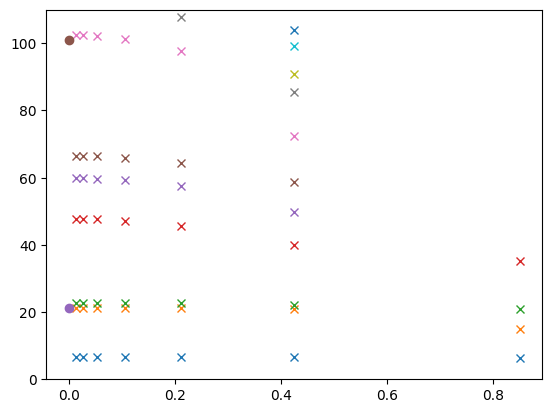

In [4]:
#plt.plot(a, [-3.8771780965519915, -3.877174859248587, -3.877176777094138, -3.8771754018108933, -3.877170002356697, -3.8771722874578787, -3.8771794846850245], 'x')
plt.plot(a, [6.194911892759967, 6.5096438629394004, 6.611145258180288, 6.63795349058979, 6.644752412087603, 6.646452262333263, 6.646867634629876],'x')
#plt.plot(a,[13.29401220437653, 13.294012204376596, 13.294012204376443, 13.294012204375669, 13.294012204375361, 13.294012204374376, 13.29401220437213],'x')
plt.plot(a,[14.861110363028448, 21.038214049654368, 21.079716068668276, 21.091871334152735, 21.09502406519766, 21.09581538004825, 21.096007005371792],'x')
plt.plot(a,[20.995946996072988, 22.09639881002374, 22.586976256734328, 22.681289717123256, 22.703547195498334, 22.709030398711135, 22.710389808308847],'x')
#plt.plot(a,[26.588024408753064, 26.58802440875313, 26.588024408753178, 26.58802440875256, 26.588024408752673, 26.588024408753018, 26.588024408751945],'x')
plt.plot(a,[35.25422287902154, 39.962749582526385, 45.65592415518153, 47.171254403497485, 47.55553581362237, 47.6519396476888, 47.67605500627354],'x')
#plt.plot(a,[39.88203661312957, 45.38859676653578, 51.1521559699103, 52.66516738385949, 53.04802021273221, 53.1440223776823, 53.16804100165786],'x')
plt.plot(a[1:],[49.83620822205399, 57.5025824503814, 59.245607851633316, 59.6788101318734, 59.787009137864274, 59.814043815458255],'x')
#plt.plot(a[1:],[53.227971709489275, 59.00202498632571, 60.524775992334824, 60.910435890180686, 61.007158063031476, 61.0313514142459],'x')
plt.plot(a[1:],[58.68260897091231, 64.44616817428694, 65.95917958823608, 66.34203241710654, 66.43803458205505, 66.46205320602806],'x')
#plt.plot(a[1:],[68.7192886650673, 96.87963426644804, 99.91513262387296, 100.6837248494329, 100.87647666075486, 100.92469595802908],'x')
plt.plot(a[1:],[72.5320559065225, 97.75857230710248, 101.32700552454746, 102.18917987731604, 102.40355720269547, 102.45708028954907],'x')
#plt.plot(a[1:],[77.48318132869508, 102.30431193982078, 105.33033476771985, 106.09604042546489, 106.28804475538168, 106.33608200330556],'x')
plt.plot(a[1:],[85.36148690175344, 107.81087209322682, 111.16820178067572, 113.44801682585829, 114.02325676360651, 114.16739186292413],'x')
plt.plot(a[1:],[90.77719353307157, 115.68486662870204, 116.60045412450026, 118.87917119619568, 119.45402835496199, 119.59806776786839],'x')
plt.plot(a[1:],[99.2955126332044, 121.10488429760355, 124.4089889211415, 126.68234162995911, 127.25634247297252, 127.40018855737686],'x')
plt.plot(a[1:],[104.07120573744815, 151.10096818706762, 129.89446632887677, 132.173183400569, 132.74804055934806, 132.89207997224258],'x')
plt.plot(a[1:],[117.55811023723406, 153.54989699612813, 162.42274361192457, 165.23524798906317, 165.94004587096333, 166.11636673190614],'x')
plt.plot(a[1:],[119.3870925025013, 158.96302806313767, 163.8592620182949, 166.5235241341199, 167.19510615185047, 167.36334144383363],'x')
plt.plot(a[1:],[119.38709250250133, 169.2509373109404, 169.26562150835866, 171.92719140892686, 172.59805073266375, 172.76610876952583],'x')
plt.plot(a[1:],[122.87177809523087, 174.64438465709222, 197.230480613233, 204.74166891551616, 206.65283199330273, 207.13271998038837],'x')
plt.plot(a[2:],[182.53535231499842, 202.64287521217804, 210.1534751838278, 212.06428352377768, 212.5440775388527],'x')
plt.plot(a[3:],[210.51046167397266, 218.01729319770317, 219.9277384746218, 220.40746588827523],'x')
plt.plot(a[3:],[215.93688741655407, 223.44748738819987, 225.35829572815538, 225.8380897432372],'x')
plt.plot(a[3:],[227.79918057662732, 232.35926485351652, 233.5097081710794, 233.79796677562553],'x')
plt.plot(a[3:],[229.00467014485912, 233.81256664602398, 235.01431761763803, 235.31484939671765],'x')
plt.plot(a[3:],[233.20090824900137, 237.75834239239092, 238.90805670995732, 239.19613553573654],'x')
plt.plot(a[3:],[249.84411683622002, 257.7137287298015, 259.7172683603459, 260.220385953028],'x')
plt.plot(a[3:],[255.30804259603661, 263.20149539655654, 265.2083059014443, 265.71211854050966],'x')
plt.plot(a[3:],[302.08286698274435, 320.58876113332076, 324.8497152123995, 325.48979675990483],'x')
#plt.plot(0, -3.8771720713820073, 'o')
plt.plot(0, 21.09608185095426, 'o')
plt.plot(0, 100.94090290734283, 'o')b
plt.plot(0, 233.89405308306846, 'o')
plt.ylim(0, 110)
#plt.yscale('log')

Text(0.5, 1.0, 'Energy Spectrum Comparison between Two Renormalization Schemes')

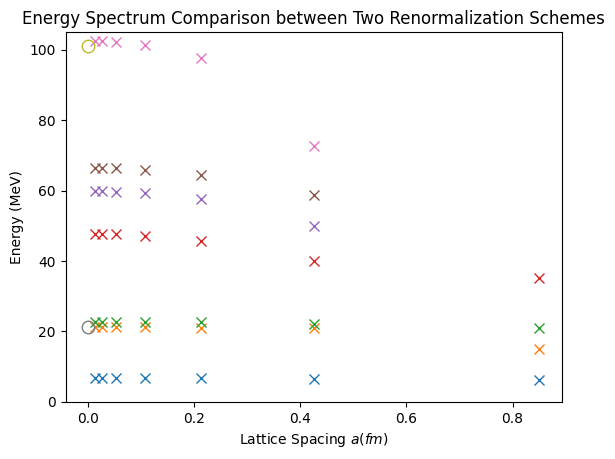

In [28]:
plt.plot(a, [6.194911892759967, 6.5096438629394004, 6.611145258180288, 6.63795349058979, 6.644752412087603, 
             6.646452262333263, 6.646867634629876], 'x', markersize=7)

plt.plot(a,[14.861110363028448, 21.038214049654368, 21.079716068668276, 21.091871334152735, 21.09502406519766, 
            21.09581538004825, 21.096007005371792], 'x', markersize=7)

plt.plot(a,[20.995946996072988, 22.09639881002374, 22.586976256734328, 22.681289717123256, 22.703547195498334, 
            22.709030398711135, 22.710389808308847], 'x', markersize=7)

plt.plot(a,[35.25422287902154, 39.962749582526385, 45.65592415518153, 47.171254403497485, 47.55553581362237, 
            47.6519396476888, 47.67605500627354], 'x', markersize=7)

plt.plot(a[1:],[49.83620822205399, 57.5025824503814, 59.245607851633316, 59.6788101318734, 59.787009137864274, 
                59.814043815458255], 'x', markersize=7)

plt.plot(a[1:],[58.68260897091231, 64.44616817428694, 65.95917958823608, 66.34203241710654, 66.43803458205505, 
                66.46205320602806], 'x', markersize=7)

plt.plot(a[1:],[72.5320559065225, 97.75857230710248, 101.32700552454746, 102.18917987731604, 102.40355720269547, 
                102.45708028954907], 'x', markersize=7)

# 'x' markers with larger size
plt.plot(0, 21.09608185095426, 'o', markerfacecolor='none', markersize=9)
plt.plot(0, 100.94090290734283, 'o', markerfacecolor='none', markersize=9)
plt.plot(0, 233.89405308306846, 'o', markerfacecolor='none', markersize=9)

plt.ylim(0, 105)

plt.xlabel('Lattice Spacing $a(fm)$')
plt.ylabel('Energy (MeV)')
plt.title('Energy Spectrum Comparison between Two Renormalization Schemes')

In [47]:
# 3 particle
E_GS, psi_GS = H.eigsh(k = 5, which = 'SA')
print(E_GS)

[13.2940122  13.2940122  26.58802441 26.58802441 26.58802441]


In [17]:
spin_lyst = [(1,1), (2,1), (3,1), (2,2)]
energy = [[], [], [], [], [], [], [], []]

mphys = 5000
lphys = (3.4 / 197.3)

for i in range(1, len(L)):
    for spin_config in spin_lyst:
        Lx = L[i]
        N_1d = Lx
        J = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/Lx))
        mu = -2*J
        U = lamq[i]*J
        s = np.arange(N_1d) 
        x = s % Lx
        T_x = (x + 1) % Lx
        basis_1d = spinful_fermion_basis_general(N_1d, Nf=spin_config, double_occupancy=True)
        hopping_left = [[-J, i, T_x[i]] for i in range(N_1d)]
        hopping_right = [[+J, i, T_x[i]] for i in range(N_1d)]
        potential = [[-mu, i] for i in range(N_1d)]
        interaction = [[U, i, i] for i in range(N_1d)]
        static = [
            ["+-|", hopping_left], ["-+|", hopping_right], ["|+-", hopping_left], ["|-+", hopping_right],
            ["n|", potential], ["|n", potential], ["n|n", interaction]]
        H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64)
        E_GS, psi_GS = H.eigsh(k = 5, which = 'SA')
        energy[i-1].append(E_GS)

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


C:\Users\lizih\AppData\Local\Temp\ipykernel_22468\935526793.py:25: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.basis_general.fermion.spinful_fermion_basis_general'>, to turn off this warning set check_pcon=False in hamiltonian
  H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64)


In [18]:
print(energy)

[[array([-10.70073885,  -3.80549452,  -3.80549452,   2.009257  ,
        13.2940122 ]), array([-3.34712965, -3.34712965,  2.009257  ,  5.43108868,  5.43108868]), array([ 5.70840874, 15.30326921, 15.30326921, 22.78252989, 22.78252989]), array([-10.55537524,  -8.69148184,  -3.68105294,  -1.79623751,
        -1.79623751])], [array([-10.7007409 ,  -2.83989058,  -2.83989058,  12.96526949,
        12.96526949]), array([-2.83451571, -2.83451571,  5.43823548,  5.43823548,  9.22216231]), array([ 5.75682546, 17.63268946, 17.63268946, 36.56354558, 36.56354558]), array([-10.39872492,  -4.27797077,  -4.27797077,   3.15227675,
         3.15227675])], [], [], [], [], [], []]


In [6]:
print(spin_lyst[0])
print(type(spin_lyst[0]))

(1, 1)
<class 'tuple'>


In [10]:
len(L)

9

In [11]:
print([[]*len(L)])

[[]]


In [37]:
# L_Number of Sites = {'Spin-ups_Spin-downs: nth state energy'}

L_4 = {'1_1': [-10.70073885, -3.80549452, -3.80549452, 2.009257, 13.2940122], 
       '2_1': [-3.34712965, -3.34712965, 2.009257, 5.43108868, 5.43108868], 
       '3_1': [5.70840874, 15.30326921, 15.30326921, 22.78252989, 22.78252989],
       '2_2': [-10.55537524, -8.69148184, -3.68105294, -1.79623751, -1.79623751],
       '3_2': [-1.33787264, -1.33787264], 
       '3_3': [-6.68222484]}

L_8 = {'1_1': [-10.7007409, -2.83989058, -2.83989058, 12.96526949, 12.96526949],
       '2_1': [-2.83451571, -2.83451571, 5.43823548, 5.43823548, 9.22216231],
       '3_1': [5.75682546, 17.63268946, 17.63268946, 36.56354558, 36.56354558],
       '2_2': [-10.39872492, -4.27797077, -4.27797077, 3.15227675, 3.15227675],
       '3_2': [-1.31189352, -1.31189352], 
       '3_3': [-6.14093426]}

L_16 = {'1_1': [-10.70071986, -2.44925259, -2.44925259, 13.2940122, 13.2940122],
        '2_1': [-2.67197996, -2.67197996, 5.62560035, 5.62560035, 10.33550219], 
        '3_1': [5.86640615, 18.2616833, 18.2616833, 42.87648704, 42.87648704],
        '2_2': [-10.16913783, -3.37006072, -3.37006072, 4.3188253, 4.3188253],
        '3_2': [-0.90624744, -0.90624744], 
        '3_3': [-5.7485]}

L_32 = {'1_1': [-10.70073247, -2.33954206, -2.33954206, 13.2940122, 13.2940122],
        '2_1': [-2.62899399, -2.62899399, 5.68845618, 5.68845618, 10.5944716], 
        '3_1': [ 5.90075298, 18.42851397, 18.42851397, 44.51947761, 44.51947761],
        '2_2': [-10.0946441, -3.13537307, -3.13537307, 4.60656903, 4.60656903],
        '3_2': [-0.77946774, -0.77946774],
        '3_3': [-5.60820894]}

L_64 = {'1_1': [-10.70072301, -2.31129631, -2.31129631, 13.2940122, 13.2940122],
        '2_1': [-2.61807903, -2.61807903, 5.70528457, 5.70528457, 10.65835999],
        '3_1': [5.90980958, 18.47097841, 18.47097841, 44.93450171, 44.93450171],
        '2_2': [-10.07480015, -3.07618087, -3.07618087, 4.6785102, 4.6785102]}

L_128 = {'1_1': [-10.70078648, -2.30426202, -2.30426202, 13.2940122, 13.2940122],
         '2_1': [-2.61542077, -2.61542077, 5.70946619, 5.70946619, 10.674202],
         '3_1': [5.91200798, 18.48154367, 18.48154367, 45.03842805, 45.03842805],
         '2_2': [-10.0699359, -3.06149859, -3.06149859, 4.69633135, 4.69633135]}

L_256 = {'1_1': [-10.70078525, -2.30247996, -2.30247996, 13.2940122 ,13.2940122],
         '2_1': [-2.61473479, -2.61473479, 5.71054081, 5.71054081, 10.6781803],
         '3_1': [],
         '2_2': []}
        
L_360 = {}
L_384 = {}

L_512 = {'1_1': [], 
         '2_2': [],
         '3_1': [],
         '2_2': []}

In [38]:
L = [2, 4, 8, 16, 32, 64, 128, 256, 512]
a = [3.4/l for l in L]
lamq = [-5.00355, -3.69772, -1.9151, -0.96, -0.480081, -0.240043, -0.120022, -0.060011, -0.0300055]
egs = [-10.70070456, -10.70073885, -10.7007409, -10.70071986, -10.70073247, -10.70072301, -10.70078648, 
       -10.70078525, -10.70078509]
ratioinv = [2.81191808154279, 3.768011688675695, 4.368973581446738, 4.573857701878632, 4.629749532200829, 
         4.643910452510084, 4.64750418500928]
ratio = [1/i for i in ratioinv]

In [39]:
energy_1_1 = [L_4['1_1'][0], L_8['1_1'][0], L_16['1_1'][0], L_32['1_1'][0], L_64['1_1'][0], L_128['1_1'][0], L_256['1_1'][0]]
energy_2_1 = [L_4['2_1'][0], L_8['2_1'][0], L_16['2_1'][0], L_32['2_1'][0], L_64['2_1'][0], L_128['2_1'][0], L_256['2_1'][0]]
energy_3_1 = [L_4['3_1'][0], L_8['3_1'][0], L_16['3_1'][0], L_32['3_1'][0], L_64['3_1'][0]]
energy_2_2 = [L_4['2_2'][0], L_8['2_2'][0], L_16['2_2'][0], L_32['2_2'][0], L_64['2_2'][0]]

In [40]:
sys_1_1_0 = [L_4['1_1'][0], L_8['1_1'][0], L_16['1_1'][0], L_32['1_1'][0], L_64['1_1'][0], L_128['1_1'][0], L_256['1_1'][0]]
sys_1_1_1 = [L_4['1_1'][1], L_8['1_1'][1], L_16['1_1'][1], L_32['1_1'][1], L_64['1_1'][1], L_128['1_1'][1], L_256['1_1'][1]]
sys_1_1_2 = [L_4['1_1'][2], L_8['1_1'][2], L_16['1_1'][2], L_32['1_1'][2], L_64['1_1'][2], L_128['1_1'][2]]
sys_1_1_3 = [L_4['1_1'][3], L_8['1_1'][3], L_16['1_1'][3], L_32['1_1'][3], L_64['1_1'][3], L_128['1_1'][3]]
sys_1_1_4 = [L_4['1_1'][4], L_8['1_1'][4], L_16['1_1'][4], L_32['1_1'][4], L_64['1_1'][4], L_128['1_1'][4]]

sys_2_1_0 = [L_4['2_1'][0], L_8['2_1'][0], L_16['2_1'][0], L_32['2_1'][0], L_64['2_1'][0], L_128['2_1'][0], L_256['2_1'][0]]
sys_2_1_1 = [L_4['2_1'][2], L_8['2_1'][2], L_16['2_1'][2], L_32['2_1'][2], L_64['2_1'][2], L_128['2_1'][2]]
sys_2_1_2 = [L_4['2_1'][3], L_8['2_1'][3], L_16['2_1'][3], L_32['2_1'][3], L_64['2_1'][3], L_128['2_1'][3]]
sys_2_1_3 = [L_4['2_1'][4], L_8['2_1'][4], L_16['2_1'][4], L_32['2_1'][4], L_64['2_1'][4], L_128['2_1'][4]]

sys_3_1_0 = [L_4['3_1'][0], L_8['3_1'][0], L_16['3_1'][0], L_32['3_1'][0], L_64['3_1'][0]]
sys_3_1_1 = [L_4['3_1'][1], L_8['3_1'][1], L_16['3_1'][1], L_32['3_1'][1], L_64['3_1'][1]]
sys_3_1_2 = [L_4['3_1'][2], L_8['3_1'][2], L_16['3_1'][2], L_32['3_1'][2], L_64['3_1'][2]]
sys_3_1_3 = [L_4['3_1'][3], L_8['3_1'][3], L_16['3_1'][3], L_32['3_1'][3], L_64['3_1'][3]]
sys_3_1_4 = [L_4['3_1'][4], L_8['3_1'][4], L_16['3_1'][4], L_32['3_1'][4], L_64['3_1'][4]]

sys_2_2_0 = [L_4['2_2'][0], L_8['2_2'][0], L_16['2_2'][0], L_32['2_2'][0], L_64['2_2'][0]]
sys_2_2_1 = [L_4['2_2'][1], L_8['2_2'][1], L_16['2_2'][1], L_32['2_2'][1], L_64['2_2'][1]]
sys_2_2_2 = [L_4['2_2'][2], L_8['2_2'][2], L_16['2_2'][2], L_32['2_2'][2], L_64['2_2'][2]]
sys_2_2_3 = [L_4['2_2'][3], L_8['2_2'][3], L_16['2_2'][3], L_32['2_2'][3], L_64['2_2'][3]]
sys_2_2_4 = [L_4['2_2'][4], L_8['2_2'][4], L_16['2_2'][4], L_32['2_2'][4], L_64['2_2'][4]]

Text(0.5, 0, 'a')

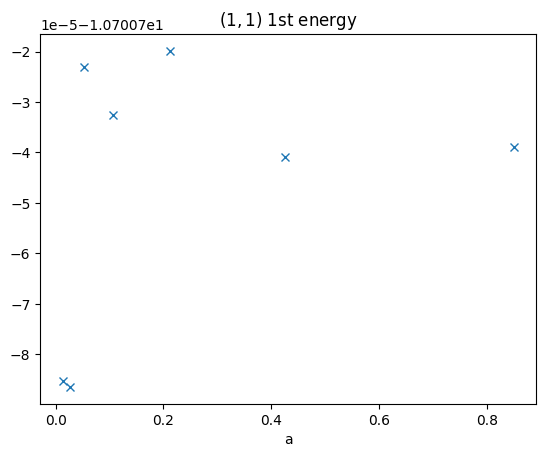

In [78]:
plt.plot(a[1:], energy_1_1, 'x')
plt.title('$(1,1)$ 1st energy')
plt.xlabel('a')

Text(0.5, 0, 'a')

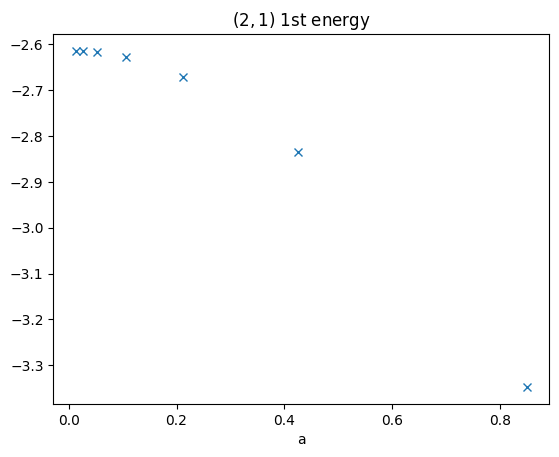

In [15]:
plt.plot(a[1:8], energy_2_1, 'x')
plt.title('$(2,1)$ 1st energy')
plt.xlabel('a')

Text(0.5, 0, 'a')

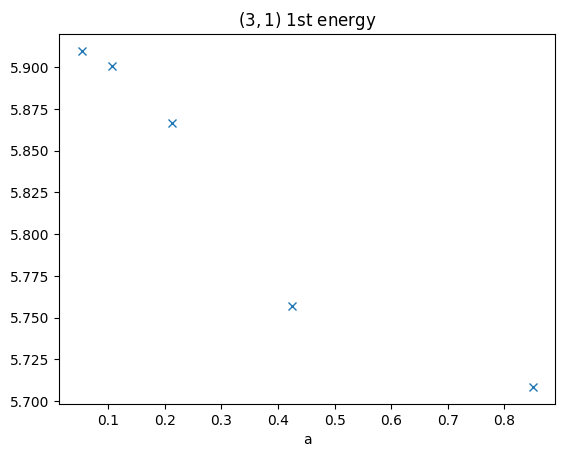

In [81]:
plt.plot(a[1:6], energy_3_1, 'x')
plt.title('$(3,1)$ 1st energy')
plt.xlabel('a')

Text(0.5, 0, 'a')

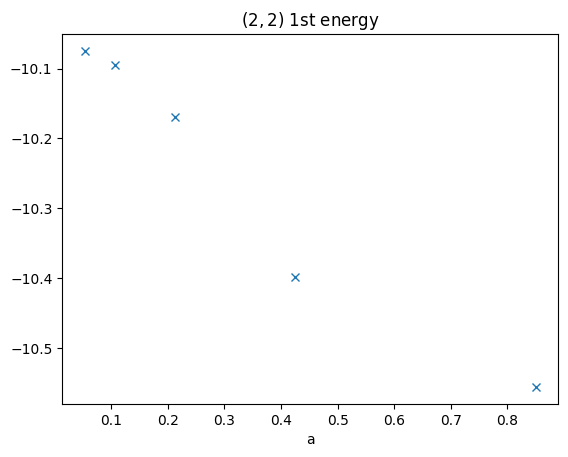

In [82]:
plt.plot(a[1:6], energy_2_2, 'x')
plt.title('$(2,2)$ 1st energy')
plt.xlabel('a')

Text(0.5, 0, 'a')

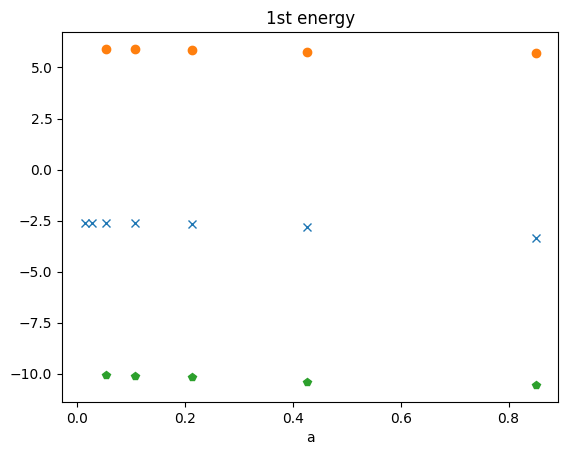

In [84]:
plt.plot(a[1:], energy_2_1, 'x')
plt.plot(a[1:6], energy_3_1, 'o')
plt.plot(a[1:6], energy_2_2, 'p')
plt.title('1st energy')
plt.xlabel('a')

Text(0.5, 0, 'a')

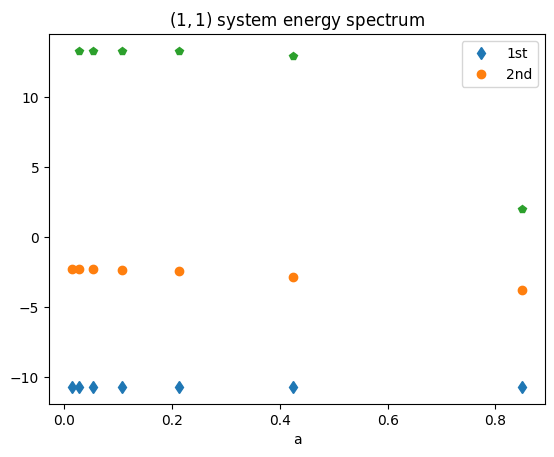

In [43]:
plt.plot(a[1:8], sys_1_1_0, 'd')
plt.plot(a[1:8], sys_1_1_1, 'o')
plt.plot(a[1:7], sys_1_1_3, 'p')
#plt.plot(a[1:7], sys_1_1_4, 'x')
plt.title('$(1,1)$ system energy spectrum')
plt.legend(['1st', '2nd'])
plt.xlabel('a')

Text(0.5, 0, 'a')

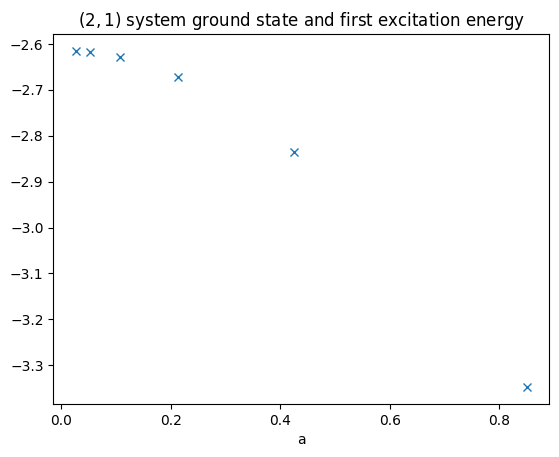

In [116]:
plt.plot(a[1:7], sys_2_1_0, 'x')
#plt.plot(a[1:7], sys_2_1_1, 'o')
plt.title('$(2,1)$ system ground state and first excitation energy')
plt.xlabel('a')

In [118]:
print(a)

[1.7, 0.85, 0.425, 0.2125, 0.10625, 0.053125, 0.0265625, 0.01328125]


Text(0.5, 0, 'a')

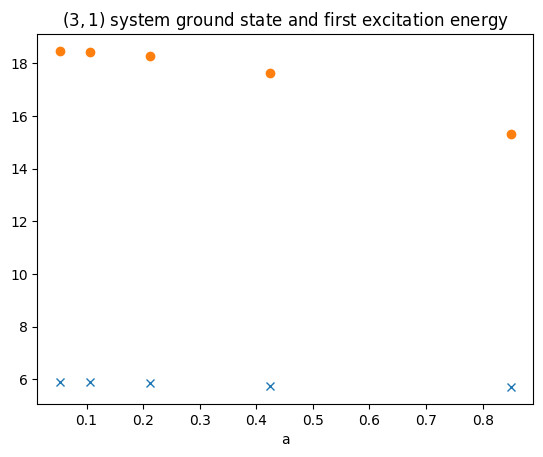

In [119]:
plt.plot(a[1:6], sys_3_1_0, 'x')
plt.plot(a[1:6], sys_3_1_1, 'o')
plt.title('$(3,1)$ system ground state and first excitation energy')
plt.xlabel('a')

Text(0.5, 0, 'a')

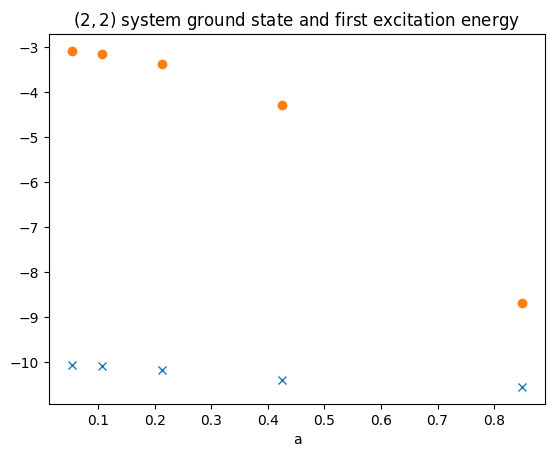

In [122]:
plt.plot(a[1:6], sys_2_2_0, 'x')
plt.plot(a[1:6], sys_2_2_1, 'o')
#plt.plot(a[1:6], sys_2_2_3, 'd')
plt.title('$(2,2)$ system ground state and first excitation energy')
plt.xlabel('a')

In [123]:
a[1:6]

[0.85, 0.425, 0.2125, 0.10625, 0.053125]

Text(0.5, 0, 'a')

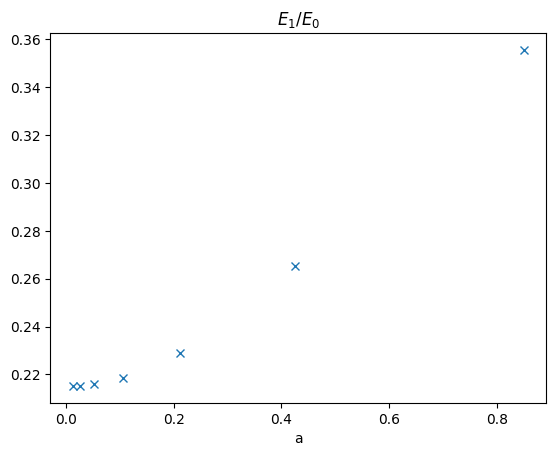

In [45]:
plt.plot(a[1:], ratio, 'x')
plt.title('$E_1/E_0$')
plt.xlabel('a')

In [47]:
excited = []
for i in range(len(ratio)):
    excited.append(egs[i+1] * ratio[i])

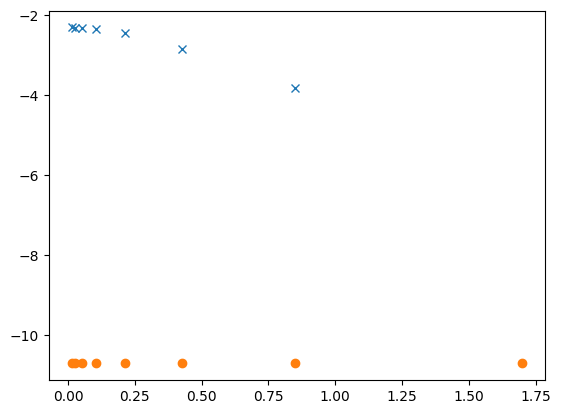

In [50]:
plt.plot(a[1:], excited, 'x')
plt.plot(a, egs, 'o')

In [122]:
def epi(n):
    return ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/n))
lam=[]
for i in range(len(lamq)):
    lam.append(lamq[i]*epi(L[i]))
print(lam)

[np.float64(-16.617515255470664), np.float64(-24.527452517074703), np.float64(-43.3461099120417), np.float64(-83.82930463540433), np.float64(-166.04785268824705), np.float64(-331.2961395803087), np.float64(-662.1932184514365), np.float64(-1324.1869966860927)]


Text(0.5, 1.0, '$\\tilde{\\lambda}$ as function of site numbers L')

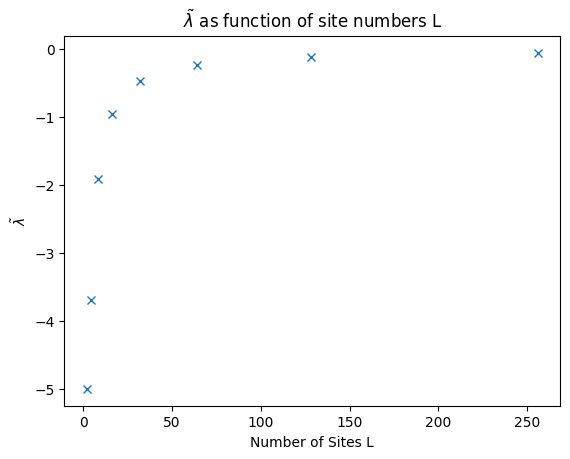

In [124]:
plt.plot(L, lamq, 'x')
plt.xlabel('Number of Sites L')
plt.ylabel("$\\tilde{\lambda}$")
plt.title('$\\tilde{\lambda}$ as function of site numbers L')

Text(0.5, 1.0, '$\\tilde{\\lambda}$ as function of lattice spacing a')

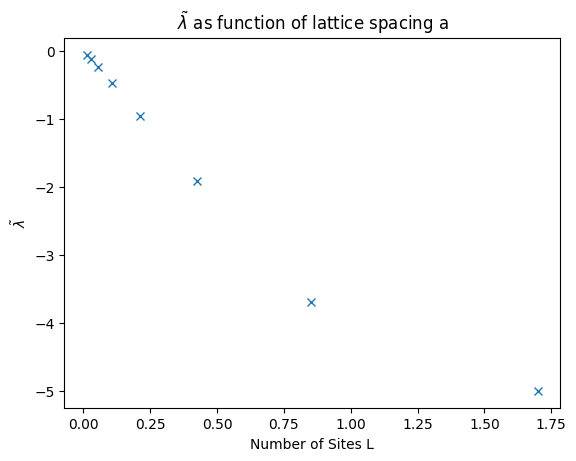

In [125]:
plt.plot(a, lamq, 'x')
plt.xlabel('Number of Sites L')
plt.ylabel("$\\tilde{\lambda}$")
plt.title('$\\tilde{\lambda}$ as function of lattice spacing a')

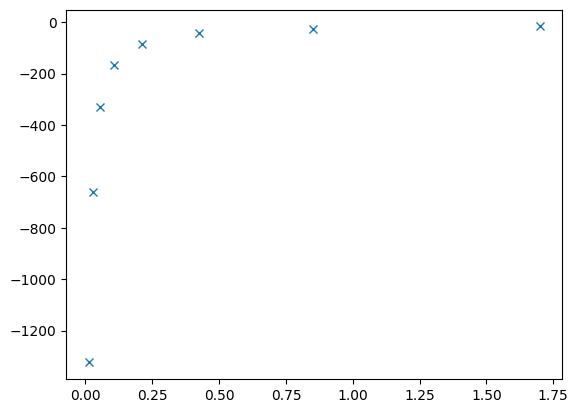

In [126]:
plt.plot(a, lam, 'x')

In [1481]:
def usolver(lowb, highb, target, error):
    urange = np.linspace(lowb, highb, 1000)
    for u in urange:
        mphys = 1634
        lphys = 3.4

        Lx = 256
        N_1d = Lx

        #a = (lphys/Lx)

        J = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/Lx))
        mu = -2*J
        U = u*J
        
        s = np.arange(N_1d) 
        x = s % Lx
        T_x = (x + 1) % Lx

        basis_1d = spinful_fermion_basis_general(
            N_1d,
            Nf=(1, 1),
            double_occupancy=True
        )

        hopping_left = [[-J, i, T_x[i]] for i in range(N_1d)]
        hopping_right = [[+J, i, T_x[i]] for i in range(N_1d)]
        potential = [[-mu, i] for i in range(N_1d)]
        interaction = [[U, i, i] for i in range(N_1d)]

        static = [
            ["+-|", hopping_left],  # spin up hops to left
            ["-+|", hopping_right],  # spin up hops to right
            ["|+-", hopping_left],  # spin down hopes to left
            ["|-+", hopping_right],  # spin up hops to right
            ["n|", potential],  # onsite potenial, spin up
            ["|n", potential],  # onsite potential, spin down
            ["n|n", interaction]
        ]

        # build hamiltonian
        H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64)
        
       # compute GS of H, smallest algebric result
        E_GS, psi_GS = H.eigsh(k=1, which="SA")

        if np.abs(E_GS - target) < error:
            return u
    return "No Ans"

In [30]:
L = [2, 4, 8, 16, 32, 64, 128, 256]
result = []

for x in L:
    mphys = 5000 # unit: MeV
    lphys = (3.4 / 197.3)  # unit: fm
    # 1fm  1/197.3  1/MeV

    Lx = x
    N_1d = Lx

    #a = (lphys/Lx)

    J = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/Lx))
    mu = -2*J
    U = 1*J
    
    s = np.arange(N_1d) 
    x = s % Lx
    T_x = (x + 1) % Lx

    basis_1d = spinful_fermion_basis_general(
        N_1d,
        Nf=(1, 1),
        double_occupancy=True
    )

    hopping_left = [[-J, i, T_x[i]] for i in range(N_1d)]
    hopping_right = [[+J, i, T_x[i]] for i in range(N_1d)]
    potential = [[-mu, i] for i in range(N_1d)]
    interaction = [[U, i, i] for i in range(N_1d)]

    static = [
        ["+-|", hopping_left],  # spin up hops to left
        ["-+|", hopping_right],  # spin up hops to right
        ["|+-", hopping_left],  # spin down hopes to left
        ["|-+", hopping_right],  # spin up hops to right
        ["n|", potential],  # onsite potenial, spin up
        ["|n", potential],  # onsite potential, spin down
        ["n|n", interaction]
    ]

    # build hamiltonian
    H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64)
    
    # compute GS of H, smallest algebric result
    E_GS, psi_GS = H.eigsh(k=1, which="SA")
    
    result.append(E_GS[0])
    print(E_GS[0])

Hermiticity check passed!
Symmetry checks passed!
1.5582946173348262
Hermiticity check passed!
Symmetry checks passed!
1.4273723418558841
Hermiticity check passed!
Symmetry checks passed!
2.1034637217288745
Hermiticity check passed!
Symmetry checks passed!
3.1650554807911777
Hermiticity check passed!
Symmetry checks passed!
4.321394900007736
Hermiticity check passed!
Symmetry checks passed!


C:\Users\lizih\AppData\Local\Temp\ipykernel_43148\1759691178.py:44: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.basis_general.fermion.spinful_fermion_basis_general'>, to turn off this warning set check_pcon=False in hamiltonian
  H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64)


5.267393484739329
Hermiticity check passed!
Symmetry checks passed!
5.890949836138015
Hermiticity check passed!
Symmetry checks passed!
6.250795680896342


In [57]:
L = [2, 4, 8, 16, 32, 64, 128, 256]
result = []

for x in L:
    mphys = 5000 # unit: MeV
    lphys = (3.4 / 197.3)  # unit: fm
    # 1fm  1/197.3  1/MeV

    Lx = x
    N_1d = Lx

    #a = (lphys/Lx)

    J = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/Lx))
    mu = -2*J
    U = 0*J
    
    s = np.arange(N_1d) 
    x = s % Lx
    T_x = (x + 1) % Lx

    basis_1d = spinful_fermion_basis_general(
        N_1d,
        Nf=(1, 1),
        double_occupancy=True
    )

    hopping_left = [[-J, i, T_x[i]] for i in range(N_1d)]
    hopping_right = [[+J, i, T_x[i]] for i in range(N_1d)]
    potential = [[-mu, i] for i in range(N_1d)]
    interaction = [[U, i, i] for i in range(N_1d)]

    static = [
        ["+-|", hopping_left],  # spin up hops to left
        ["-+|", hopping_right],  # spin up hops to right
        ["|+-", hopping_left],  # spin down hopes to left
        ["|-+", hopping_right],  # spin up hops to right
        ["n|", potential],  # onsite potenial, spin up
        ["|n", potential],  # onsite potential, spin down
        ["n|n", interaction]
    ]

    # build hamiltonian
    H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64)
    
    # compute GS of H, smallest algebric result
    E_GS, psi_GS = H.eigsh(k=1, which="SA")
    
    result.append(E_GS[0])
    print(E_GS[0])

Hermiticity check passed!
Symmetry checks passed!
2.2204460492503126e-16
Hermiticity check passed!
Symmetry checks passed!
-1.3988810110276972e-14
Hermiticity check passed!
Symmetry checks passed!
-7.451153020726869e-16
Hermiticity check passed!
Symmetry checks passed!
-4.218847493575595e-15
Hermiticity check passed!
Symmetry checks passed!
-9.24194070034965e-15
Hermiticity check passed!
Symmetry checks passed!


C:\Users\lizih\AppData\Local\Temp\ipykernel_43148\1099897308.py:44: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.basis_general.fermion.spinful_fermion_basis_general'>, to turn off this warning set check_pcon=False in hamiltonian
  H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64)


-7.993605792390175e-13
Hermiticity check passed!
Symmetry checks passed!
-4.1211504469625583e-13
Hermiticity check passed!
Symmetry checks passed!
-3.0754912505619955e-13


In [37]:
print(result)

[np.float64(-30.613127431950087), np.float64(-57.595175062932945), np.float64(-196.2857461235178), np.float64(-755.2593028362279), np.float64(-2992.013019889391), np.float64(-11939.23735857546), np.float64(-47728.18676575138), np.float64(-190883.99738798587)]


In [7]:
def e1l(n):
    return (2*(((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/n)))*(1-np.cos(2*np.pi/n)))

In [8]:
L = [2, 4, 8, 16, 32, 64, 128, 256]
a = [3.4/l for l in L]

In [25]:
mphys = 5000
lphys = (3.4 / 197.3)
result0dl = []
for i in range(len(L)):
    result0dl.append(result0[i]/e1l(L[i]))

Text(0.5, 1.0, 'Energy as Function of Lattice Spacing a with different $\\tilde{\\lambda}$')

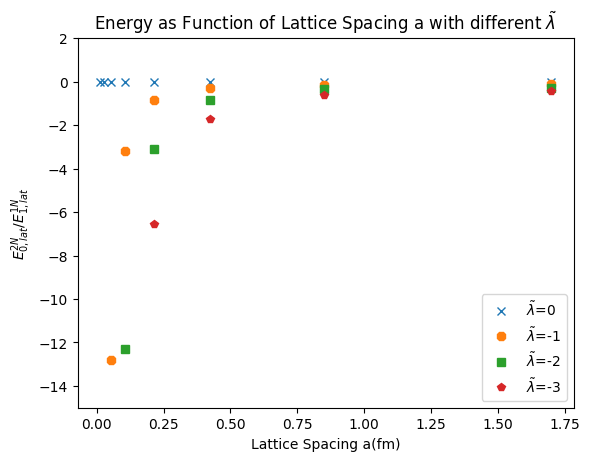

In [30]:
plt.plot(a, result0dl, 'x')
plt.plot(a, resultn1dl, '8')
plt.plot(a, resultn2dl, 's')
plt.plot(a, resultn3dl, 'p')
plt.ylim(-15, 2)
plt.legend(['$\\tilde{\lambda}$=0', '$\\tilde{\lambda}$=-1', '$\\tilde{\lambda}$=-2', '$\\tilde{\lambda}$=-3'])
plt.xlabel('Lattice Spacing a(fm)')
plt.ylabel('$E^{2N}_{0, lat}$/$E^{1N}_{1, lat}$')
plt.title('Energy as Function of Lattice Spacing a with different $\\tilde{\lambda}$')

In [24]:
result1=[1.5582946173348262, 1.4273723418558841, 2.1034637217288745, 3.1650554807911777, 4.321394900007736,
         5.267393484739329, 5.890949836138015, 6.250795680896342]
result0=[2.2204460492503126e-16, -1.3988810110276972e-14, -7.451153020726869e-16, -4.218847493575595e-15,
         -9.24194070034965e-15, -7.993605792390175e-13, -4.1211504469625583e-13, -3.0754912505619955e-13]
resultn1=[-1.7652084337593044, -1.9472496151319933, -4.03017559525839, -11.481514694434717, 
          -42.64704752839086, -169.93516581586667, -679.3309203103481, -2716.9144776968838]
resultn2=[-3.7326449734412797, -4.558823647602129, -11.495642838275492, -41.298326844454564, -163.3275468469878,
         -651.736746868532, -2605.3768965651216, -10419.93820464013]
resultn3=[-5.889253630325927, -7.919791470941295, -23.003984134459362, -87.32698779510685, -345.93302672380537,
         -1380.4005815846185, -5518.276820428636, -22069.78327810151]
resultn4=[-8.216151389160613, -12.007310366206612, -37.71145779283247, -144.68051635583527, -573.160604887785,
         -2287.12256960023, -9142.980399802527, -36566.41420969861]
resultn5=[-10.691677961536103, -16.707931185082472, -54.577739623601076, -209.84611268326813, -831.3200403516857,
         -3317.2740949723993, -13261.104776035882, -53036.431110496254]
resultn6=[-13.294012204376536, -21.878638014661348, -72.88970938034787, -280.4005188878264, -1110.8264236319658,
         -4432.607828828843, -17719.752774805198, -70868.33738273966]
resultn7=[-16.00290949555249, -27.392832077888425, -92.19691141758658, -354.72525303460355, -1405.2691170232683,
         -5607.54295829794, -22416.662771042502, -89653.14812473749]
resultn8=[-18.800572357782734, -33.15472414085721, -112.20991402584347, -431.7446627658228, -1710.3869453378707,
         -6825.075820075333, -27283.861074844775, -109119.00952168557]
resultn9=[-21.67188968687445, -39.096431294723374, -132.73725955512765, -510.7350858950602, -2023.3130805565513,
         -8073.766711205096, -32275.61643363481, -129083.02411007263]
resultn10=[-24.604305990737, -45.17075684260481, -153.6486777515116, -591.2000247106549, -2342.0806134187815,
         -9345.76693705653, -37360.55297708227, -149419.7073082308]
resultn11=[-27.587518944215763, -51.344770035745405, -174.85319415909964, -672.7912874391471, -2665.3101578798396,
         -10635.572237692324, -42516.66692568277, -170041.05725238958]
resultn12=[-30.613127431950087, -57.595175062932945, -196.2857461235178, -755.2593028362279, -2992.013019889391,
         -11939.23735857546, -47728.18676575138, -190883.99738798587]
resultn13=[-33.67429379217141, -63.90519650705494, -217.89878403771235, -838.421454400808, -3321.465751302192,
         -13253.875474325932, -52983.5721503839, -211902.37327887383]
resultn14=[-36.765447378459946, -70.26252614714514, -239.65686910025394, -922.1415425352758, -3653.128787804195,
         -14577.333523987003, -58274.216022665154, -233061.76188196256]
resultn15=[-39.8820366131296, -76.65796733591728,-261.5331163847682, -1006.3161992546014, -3986.592629829601,
         -15907.977453000141, -63593.58610094178, -254336.03800543892]

Text(0.5, 1.0, 'Energy Change as Function of Sites L with different $\\tilde{\\lambda}$')

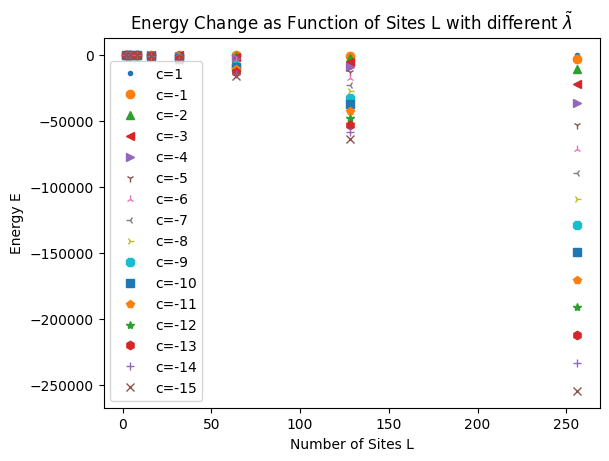

In [46]:
plt.plot(L, result1, '.')
plt.plot(L, resultn1, 'o')
plt.plot(L, resultn2, '^')
plt.plot(L, resultn3, '<')
plt.plot(L, resultn4, '>')
plt.plot(L, resultn5, '1')
plt.plot(L, resultn6, '2')
plt.plot(L, resultn7, '3')
plt.plot(L, resultn8, '4')
plt.plot(L, resultn9, '8')
plt.plot(L, resultn10, 's')
plt.plot(L, resultn11, 'p')
plt.plot(L, resultn12, '*')
plt.plot(L, resultn13, 'h')
plt.plot(L, resultn14, '+')
plt.plot(L, resultn15, 'x')
plt.legend(['c=1', 'c=-1', 'c=-2', 'c=-3', 'c=-4', 'c=-5', 'c=-6', 'c=-7', 'c=-8', 
            'c=-9', 'c=-10', 'c=-11', 'c=-12', 'c=-13', 'c=-14', 'c=-15'])
plt.xlabel('Number of Sites L')
plt.ylabel('Energy E')
plt.title('Energy Change as Function of Sites L with different $\\tilde{\lambda}$')

Text(0.5, 0, 'a')

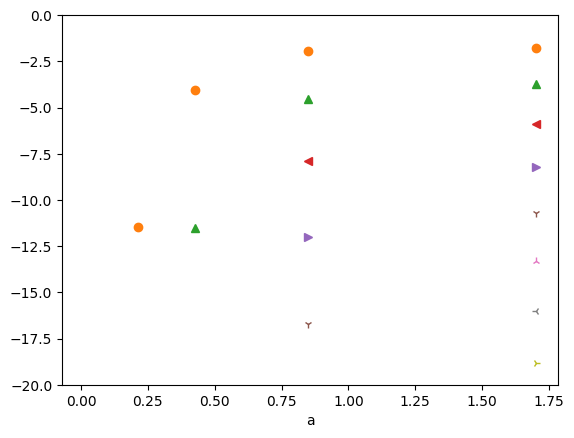

In [53]:
plt.plot(a, result1, '.')
plt.plot(a, resultn1, 'o')
plt.plot(a, resultn2, '^')
plt.plot(a, resultn3, '<')
plt.plot(a, resultn4, '>')
plt.plot(a, resultn5, '1')
plt.plot(a, resultn6, '2')
plt.plot(a, resultn7, '3')
plt.plot(a, resultn8, '4')
plt.plot(a, resultn9, '8')
plt.plot(a, resultn10, 's')
plt.plot(a, resultn11, 'p')
plt.plot(a, resultn12, '*')
plt.plot(a, resultn13, 'h')
plt.plot(a, resultn14, '+')
plt.plot(a, resultn15, 'x')
#plt.legend(['c=1', 'c=-1', 'c=-2', 'c=-3', 'c=-4', 'c=-5', 'c=-6', 'c=-7', 'c=-8', 
#            'c=-9', 'c=-10', 'c=-11', 'c=-12', 'c=-13', 'c=-14', 'c=-15'])
plt.ylim(-20, 0)
plt.xlabel('a')

In [2]:
def Ilatsum(L):
    epi = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/L))
    tempsum = []
    for i in range(L):
        tempsum.append((3.4 / L)/((energy/(2*epi))-2-2*np.cos(2*np.pi*i/L)))
    return np.sum(tempsum)/L

In [7]:
def Ilatsum(L):
    epi = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/L))
    tempsum = []
    for i in range(L):
        tempsum.append(1/((energy/(2*epi))-2-2*np.cos(2*np.pi*i/L)))
    return np.sum(tempsum)/L

In [11]:
mphys = 5000
lphys = (3.4 / 197.3)
energy =-10
print(Ilatsum(1024))

-0.46029547998864306


Text(0.5, 1.0, '$I_{lat}$ as Function of Lattice Spacing a')

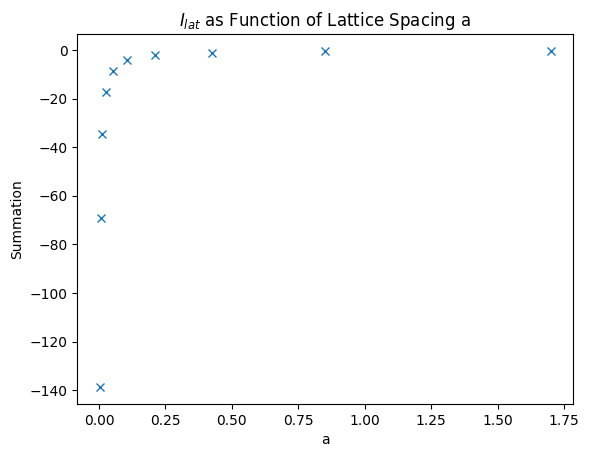

In [22]:
L = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
a = [3.4/l for l in L]
mphys = 5000
lphys = (3.4 / 197.3)
energy =-10
ilat=[]
for l in L:
    ilat.append(Ilatsum(l))
#print(ilat)
plt.plot(a, ilat, 'x')
plt.ylabel('Summation')
plt.xlabel('a')
plt.title('$I_{lat}$ as Function of Lattice Spacing a')

In [33]:
x = np.linspace(0.003, 3, 1000)
pm = [-0.0000487706 - 0.460295/i -0.00493559 * i - 0.00790536 * i**2 - 0.0246568 * i**3  for i in x]

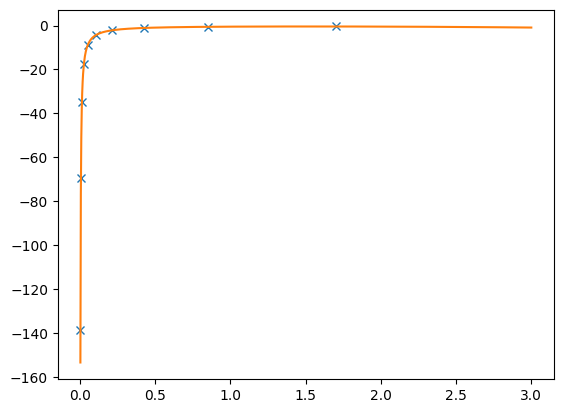

In [34]:
plt.plot(a, ilat, 'x')
plt.plot(x, pm)

In [36]:
difference = []
for i in range(len(ilat)):
    difference.append(ilat[i] - (-0.0000487706 - 0.460295/a[i] -0.00493559*a[i] - 0.00790536*a[i]**2 - 0.0246568*a[i]**3))
print(difference)

[np.float64(2.6604847713773694e-07), np.float64(-7.415897404494665e-06), np.float64(2.4187850818035983e-05), np.float64(-1.295558347491621e-05), np.float64(-2.9770896429859306e-05), np.float64(-1.2843190971167928e-05), np.float64(1.5312865286887245e-06), np.float64(6.856943812749705e-07), np.float64(-2.1932630133392195e-05), np.float64(-7.931492925195016e-05)]


In [12]:
lambd = [2/i for i in ilat]
print(lambd)

[np.float64(-4.726052912611234), np.float64(-3.5296467105990295), np.float64(-1.83740783972964), np.float64(-0.9225950875229108), np.float64(-0.4615835544616583), np.float64(-0.2308209090276045), np.float64(-0.11541388619745702), np.float64(-0.057707365480044875), np.float64(-0.028853735331922172), np.float64(-0.014426874233402956)]


Text(0.5, 1.0, '$\tilde{\\lambda}$ as Function of Lattice Spacing a')

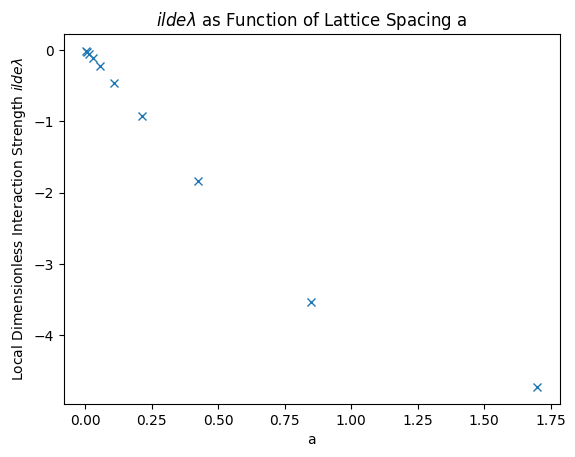

In [20]:
plt.plot(a, lambd, 'x')
plt.xlabel('a')
plt.ylabel('Local Dimensionless Interaction Strength $\tilde{\lambda}$')
plt.title('$\tilde{\lambda}$ as Function of Lattice Spacing a')

In [38]:
x = np.linspace(0.003, 3, 1000)
pm2 = [-4.34503*i + 0.0616926*i**3 - 0.019992*i**4 + 0.43607*i**5 -0.15193*i**6 for i in x]
pm3 = [2/i for i in pm]

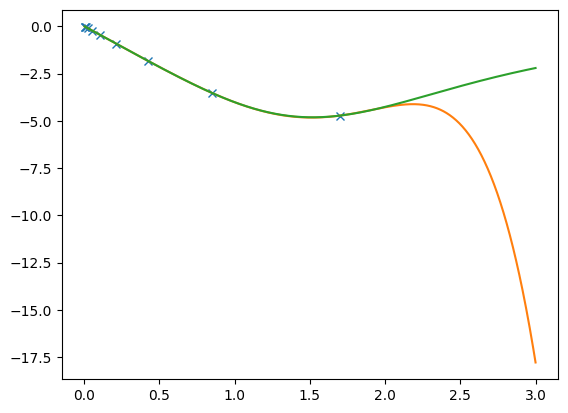

In [39]:
plt.plot(a, lambd, 'x')
plt.plot(x, pm2)
plt.plot(x, pm3)

In [40]:
difference = []
for i in range(len(ilat)):
    difference.append(lambd[i] - (-4.34503*a[i] + 0.0616926*a[i]**3 - 0.019992*a[i]**4 + 0.43607*a[i]**5 -0.15193*a[i]**6))
print(difference)

[np.float64(2.796505876645483e-05), np.float64(-8.479336997879727e-06), np.float64(-4.851812996697902e-06), np.float64(-2.3933685596722043e-06), np.float64(-1.253265176359708e-06), np.float64(-4.618935137146174e-07), np.float64(-1.788014498266266e-07), np.float64(-7.987719156943296e-08), np.float64(-3.852082754510211e-08), np.float64(-1.9067513186421525e-08)]


In [16]:
def epi(n):
    return ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/n))

[np.float64(-15.70705127469575), np.float64(-23.461583223920492), np.float64(-41.698681766580144), np.float64(-80.56302567404751), np.float64(-159.67699594701438), np.float64(-318.62531706359584), np.float64(-636.8857729590158), np.float64(-1273.5890496947889), np.float64(-2547.086843067436), np.float64(-5094.128056901505)]


Text(0.5, 1.0, '$2\\epsilon /I_{lat}$ as Function of Lattice Spacing a')

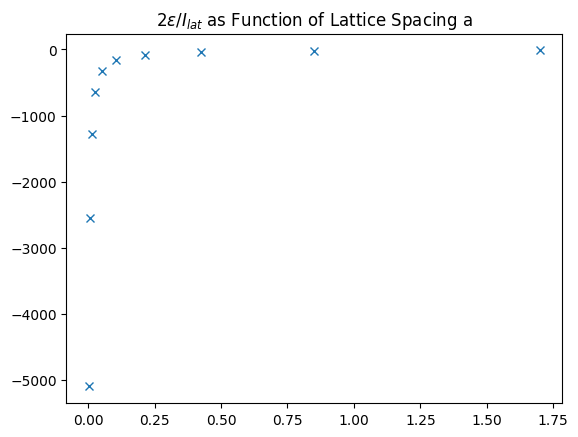

In [18]:
lamb = []
for i in range(len(lambd)):
    lamb.append(lambd[i] * epi(L[i]))
print(lamb)
plt.plot(a, lamb, 'x')
plt.title('$2\epsilon /I_{lat}$ as Function of Lattice Spacing a')

[np.float64(-26.701987166982775), np.float64(-19.942345740332417), np.float64(-17.72193975079656), np.float64(-17.119642955735095), np.float64(-16.965680819370277), np.float64(-16.92696996900353), np.float64(-16.917278344223856), np.float64(-16.914854566258914), np.float64(-16.91424856724469), np.float64(-16.91409706393078)]


Text(0.5, 1.0, '$\\lambda a$ as Function of Lattice Spacing a')

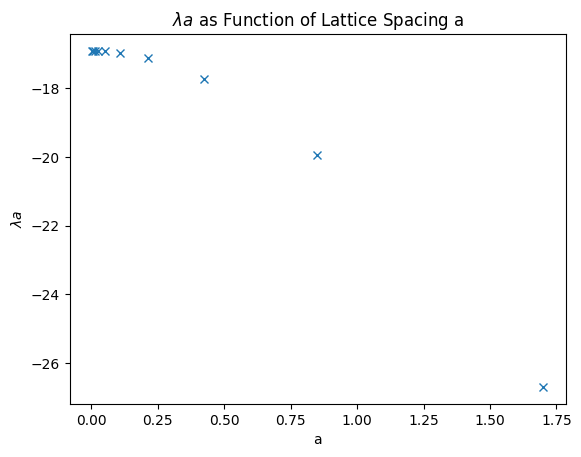

In [21]:
la = []
for i in range(len(lamb)):
    la.append(lamb[i] * a[i])
print(la)
plt.plot(a, la, 'x')
plt.xlabel('a')
plt.ylabel('$\lambda a$')
plt.title('$\lambda a$ as Function of Lattice Spacing a')

Text(0.5, 0, 'a')

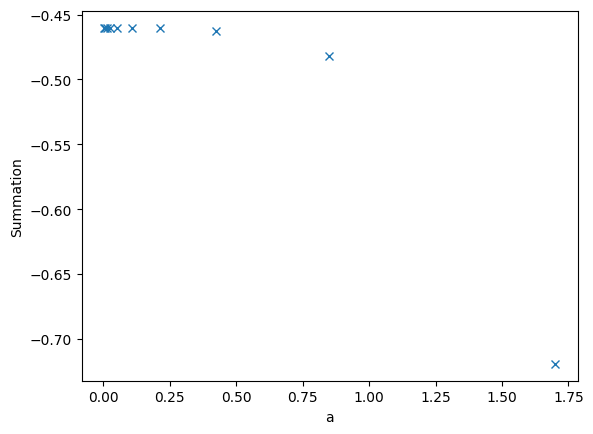

In [4]:
L = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
a = [3.4/l for l in L]
mphys = 5000
lphys = (3.4 / 197.3)
energy =-10
ilat=[]
for l in L:
    ilat.append(Ilatsum(l))
#print(ilat)
plt.plot(a, ilat, 'x')
plt.ylabel('Summation')
plt.xlabel('a')

### 1D Chain with On-Site Interaction, Off-site interaction, and Periodic Boundary Condition

In [363]:
# c only
mphys = 5000
lphys = (3.4 / 197.3)
L = 2
N_up = 1
N_down = 1
J = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/L))
mu = -2*J
cq = -1.071886098*J
basis_up = spinless_fermion_basis_1d(L, Nf=N_up)
basis_down = spinless_fermion_basis_1d(L, Nf=N_down)
basis = tensor_basis(basis_up, basis_down)
hop_left = [[-J, i, (i + 1) % L] for i in range(L)]
hop_right = [[J, i, (i + 1) % L] for i in range(L)]
mu_term = [[-mu, i] for i in range(L)]
c_interact_1 = [[cq, i, i, (i + 1) % L, (i + 1) % L] for i in range(L)] # spin-up at x, spin-down at x + 1
c_interact_2 = [[cq, (i + 1) % L, (i + 1) % L, i, i] for i in range(L)] # spin-down at x, spin-up at x + 1
c_interact_3 = [[-cq, i, (i + 1) % L, (i + 1) % L, i] for i in range(L)] # spin-up hop from x + 1 to x
                                                                        # spin-down hop from x to x + 1
c_interact_4 = [[-cq, (i + 1) % L, i, i, (i + 1) % L] for i in range(L)] # spin-up hop from x to x + 1
                                                                        # spin-down hop from x + 1 to x
static = [["+-|", hop_left], ["-+|", hop_right], ["|+-", hop_left], ["|-+", hop_right], ["n|", mu_term],
    ["|n", mu_term], ["+-|+-", c_interact_1], ["+-|+-", c_interact_2], ["+-|+-", c_interact_3], ["+-|+-", c_interact_4]]
no_checks = dict(check_pcon=False, check_symm=False, check_herm=False)
H = hamiltonian(static, [], basis=basis, **no_checks)
#print(H.toarray())
E_GS, psi_GS = H.eigsh(k = 1, which = 'SA')
print(E_GS)
#E_GS, psi_GS = H.eigh()
#print(sorted(E_GS.tolist()))

[-0.95565466]


In [364]:
print(H)

static mat: 
<Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 14 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	(13.294012204376532+0j)
  (0, 1)	(-6.647006102188266+0j)
  (0, 2)	(-6.647006102188266+0j)
  (1, 0)	(-6.647006102188266+0j)
  (1, 1)	(6.169178770119762+0j)
  (1, 2)	(7.12483343425677+0j)
  (1, 3)	(-6.647006102188266+0j)
  (2, 0)	(-6.647006102188266+0j)
  (2, 1)	(7.12483343425677+0j)
  (2, 2)	(6.169178770119762+0j)
  (2, 3)	(-6.647006102188266+0j)
  (3, 1)	(-6.647006102188266+0j)
  (3, 2)	(-6.647006102188266+0j)
  (3, 3)	(13.294012204376532+0j)


dynamic:



In [ ]:
[1.18229252e-12 1.32940122e+01 1.34027867e+01 1.32940122e+01
 1.34027867e+01]

In [3]:
Ls = [2, 4, 8, 16, 32, 64, 128, 256, 512]
a = [3.4 / l for l in Ls]
cqs = [-5, -5.833333, -2.82146615, -1.725212198, -1.31845505, -1.148799979, -1.071886098, -1.0353270445 ,-1.0175111255]
cegs = [-53.17604882, -53.17604451, -53.17604877, -53.17604877, 
       -53.17604802, -53.17604882, -53.17604836, -53.17604810, -53.17604876]

In [6]:
mphys = 5000
lphys = (3.4 / 197.3)
def epi(n):
    return ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/n))    

In [9]:
c = []
for i in range(len(Ls)):
    c.append(cqs[i] * epi(Ls[i])**2)
print(c)

[np.float64(-55.228362653160055), np.float64(-257.732344320517), np.float64(-1453.143038050056), np.float64(-13155.02814085534), np.float64(-157779.06594721088), np.float64(-2189044.9835506417), np.float64(-32640409.88671688), np.float64(-504282265.9394051), np.float64(-7929076061.314601)]


In [397]:
# L_Number of Sites = {'Spin-ups_Spin-downs: nth state energy'}

####
Lc_2 = {'1_1': [-53.176048817506114, 4.1397148203598385e-17]}


Lc_4 = {'1_1': [-53.17604450593465, -53.17604450593463, -50.960375685439345, -50.96037568543932, 7.760537488970244e-16, 
                13.294012204376541, 13.294012204376543, 26.588024408753064, 26.588024408753068, 26.588024408753068],
        #12457
        '2_1': [-87.95131996135878, -77.11404847037082, -77.11404847037062, -66.02905447324021, -12.284201327572186, 
                -12.284201327572172, -12.18617563834313, -7.723835694141809, -3.0123050140854546, -3.0123050140854426, 
                1.1078365660334126, 1.1078365660334129, 4.464441337716911, 7.238206915490722, 7.238206915490729],
        #01347
        '3_1': [-101.92075137087863, -32.61263443692396, -28.49249285680512, -28.4924928568051, -28.492492856805093, 
                -28.49249285680509, -24.37235127668625, 14.401848770409947, 14.401848770409948, 14.401848770409948],
        #01267
        '2_2': [-179.7775512684635, -110.16103453111644, -67.26669290390153, -67.2666929039014, -67.26669290390139, 
                -67.26669290390136, -63.146551323782745, -63.14655132378258, -63.14655132378257, -63.14655132378242, 
                -32.612634436923955, -32.612634436923955, -29.014178255306046, -28.492492856805193, -28.492492856805143],
        #0126 10
        '3_2': [], 
        '3_3': []}

Lc_8 = {'1_1':[-53.17604876676123, -51.141240875978106, -51.1412408759778, -45.30072932816938, -45.30072932816925, 
               -39.64183354611381, -39.64183354611362, -37.28519583970861, 2.131474927733265e-14, 13.294012204376536, 
               13.294012204376596, 21.890701876273912, 21.89070187627398, 26.58802440875302, 26.588024408753046], 
        #01357
        '2_1': [-77.16940422149042, -75.10859395559156, -75.10859395559135, -71.80791262702141, -71.80791262702125, 
                -69.08227554723355, -69.08227554723344, -67.91285514961591, -41.540879149046745, -35.78621302792633, 
                -35.78621302792601, -34.82990626592524, -34.829906265925075, -34.160886427044446, -34.16088642704433], 
        #01357
        '3_1': [-72.87201592724749, -72.87201592724747, -71.60896602293492, -71.6089660229348, -70.4685815582125, 
                -68.52420656982616, -68.524206569826, -63.6971781402641, -55.33868726422943, -50.660062826876896, 
                -50.660062826876725, -45.079013690023935, -45.079013690023594, -38.58680211236406, -38.58680211236394],
        #02457
        '2_2': [-133.67271331173907, -133.67271331173896, -133.65592304255927, -133.6471195202319, -133.64711952023174, 
                -132.88684746084454, -132.88684746084436, -132.52331633289802, -103.1322304616985, -103.13223046169782, 
                -99.42567616270199, -94.78151783758237, -94.78151783758236, -93.05145836039021, -93.05145836039017],
        #0589 10
        '3_2': [], 
        '3_3': []}

Lc_16 = {'1_1':[-53.17604877442618, -49.43833018706635, -49.43833018706632, -38.391147923491424, -38.391147923491275, 
                -22.001313565976755, -22.001313565976492, -2.624400287945921, -2.624400287945892, 8.9365631332455e-14, 
                13.294012204376411, 13.294012204376475, 16.744430863156428, 16.744430863156474, 19.189934959993508], 
        #01357
         '2_1': [-71.54874211133998, -68.37619787104981, -68.37619787104911, -60.708097419459385, -60.708097419458284, 
                 -49.778002785169605, -49.778002785168795, -42.20156204139134, -37.922393255714624, -37.92239325571407, 
                 -35.85474568028639, -35.85474568028617, -31.845252996250057, -31.845252996249947, -21.37573109001585], 
        #01357
         '3_1': [-60.83874968484834, -60.838749684847244, -59.93942469262486, -59.93942469262485, -56.071236482188915, 
                 -52.646307332450775, -50.405857420067115, -50.40585742006675, -43.50464269586321, -43.50464269586263, 
                 -35.74700322426336, -35.74700322426331, -29.957790138826788, -29.957790138826656, -19.855545059989723],
         #02456
         '2_2': [-125.0070226884975, -123.59563797340623, -123.59563797340583, -119.76231929484247, -119.76231929483981, 
                 -113.3529229811699, -113.35292298116667, -105.5209950671754, -105.52099506717481, -100.1818808812255, 
                 -97.25962590924131, -97.2596259092409, -95.03227879790764, -95.03227879790731, -89.8513038196649],
         #01379
         '3_2': [], 
         '3_3': []}

Lc_32 ={'1_1': [-53.176048017506645, -48.21224715253332, -48.21224715253294, -33.219546523374184, -33.21954652337348, 
                -9.012350920500506, -9.012350920500014, 9.421083077700931e-14, 13.294012204375507, 13.294012204376306, 
                18.165952234682635, 18.16595223468265, 23.63678994085014, 23.636789940850143, 26.58802440875279], 
        #01357
        '2_1': [-67.99231493278721, -63.68404748652252, -63.68404748652027, -53.03587599410102, -53.03587599409955, 
                -41.29618999319996, -38.25189136657228, -38.25189136657184, -36.945360580579155, -36.945360580579056, 
                -29.225957016836304, -29.225957016835352, -19.996117302689104, -14.919543375774982, -14.91954337577483], 
        #01356
        '3_1': [-56.8718313979421, -56.871831397941044, -53.443788542570076, -53.44378854256915, -52.93151950315584, 
                -46.910968284655716, -38.447689006167494, -38.447689006165646, -36.59045455574762, -36.59045455574742, 
                -19.100288635440727, -19.100288635440542, -14.190959711279564, -14.190959711279191, -12.500408487177683],
        #02456
        '2_2': [-115.18555352534158, -112.31051789813502, -112.31051789813262, -105.9610227157281, -105.96102271572461, 
                -97.78228999469148, -93.4294692846184, -93.42946928461808, -88.70839191042312, -88.7083919104229, 
                -84.16129161377496, -80.63953815877923, -80.6395381587783, -79.05420930192032, -79.05420930191917],
        #01356
        '3_2': [], 
        '3_3': []}

Lc_64 = {'1_1':[-53.176048816328105, -47.45654385358043, -47.456543853579056, -30.094944447959733, -30.094944447958138, 
                -1.4896523539374449, -1.489652353937065, 5.973235293509909e-13, 13.294012204375392, 13.294012204376475, 
                17.72934906289481, 17.72934906289581, 26.588024408751703, 26.58802440875268, 26.58802440875302], 
         #01357
         '2_1': [-66.46307315366937, -61.4943905136753, -61.49439051367297, -49.44983756352862, -49.449837563524994, 
                 -40.65410422286131, -38.30323640878882, -38.30323640878818, -30.95482647710484, -30.954826477104167, 
                 -27.346783242725614, -27.34678324272547, -20.568630417291825, -13.259855615887252, -13.259855615885474],
         #01357
         '3_1': [-55.238834946031666, -55.23883494602999, -51.19652745595407, -50.61811220809928, -50.61811220809205, 
                 -44.73721292325004, -33.53492543765026, -33.53492543764731, -32.77877780801596, -32.778777808013636, 
                 -14.74064955708303, -14.740649557081346, -14.096898033482821, -11.062343633370793, -11.062343633370354],
         #02356
         '2_2': [-111.93290152994399, -108.0080894632365, -108.00808946322925, -100.90896817021492, -100.90896817020516, 
                 -95.93937619249661, -85.22327337202557, -85.22327337202526, -84.83652537865531, -84.8365253786545, 
                 -82.68389873937089, -78.8123742323641, -78.81237423236271, -74.73135522654312, -74.73135522654266],
         #01356
         '3_2': [], 
         '3_3': []}

Lc_128 = {'1_1':[-53.17604836130988, -47.0370978153037, -47.03709781529723, -28.389674444601194, -28.389674444594377, 
                 8.761243454871257e-13, 2.4896278577127244, 2.489627857716873, 13.294012204374535, 13.294012204374662, 
                 17.5286234243189, 17.528623424320624, 26.588024408747003, 26.5880244087512, 26.588024408753164],
          #01357
          '2_1': [-66.03989334760445, -60.75374181557919, -60.75374181557783, -48.07127298719276, -48.07127298718917, 
                  -40.432926932170915, -38.34433361957584, -38.3443336195737, -28.351376682360776, -28.351376682356996, 
                  -26.26248603032506, -26.26248603032112, -20.755944744333352, -12.415078282019714, -12.415078282019321],
          #01357
          '3_1': [],
          '2_2': [-111.30277778349604, -106.92486149358905, -106.92486149355896, -99.36118957952233, -99.36118957950791, 
                  -95.25515601687306, -83.16279728482867, -83.16279728480279, -82.58977537397345, -82.2499858352435, 
                  -82.24998583523194, -78.57175296349872, -78.57175296348805, -73.02184929933993, -73.02184929933362],
          #01356
          '3_2': [], 
          '3_3': []}

Lc_256 = {'1_1': [-53.17604810380852, -46.816270614952856, -46.81627061492848, -27.50089336540019, -27.50089336539338, 
                   1.3576198446176579e-12, 4.525496492292936, 4.5254964923002925, 13.294012204341962, 13.294012204370738, 
                   17.432477871910624, 17.43247787191466, 26.588024408743816, 26.588024408743994, 26.588024408744207], 
          '2_1': [], 
          '3_1': [],
          '2_2': [],
          '3_2': [], 
          '3_3': []}

Lc_360 = {}
Lc_384 = {}

Lc_512 = {'1_1': [-53.176048758775664, -46.70299692027437, -46.7029969202423, -27.04746623717698, -27.047466237156428, 
                 -5.670514156413515e-11, 5.553717991445385, 5.553717991448583, 13.29401220433956, 13.294012204370073, 
                 17.385436483453002, 17.385436483453105, 26.58802440871993, 26.588024408724227, 40.24191178348119], 
          '2_2': [],
          '3_1': [],
          '2_2': []}

In [398]:
excited = [Lc_4['1_1'][2], Lc_8['1_1'][1], Lc_16['1_1'][1], Lc_32['1_1'][1], 
           Lc_64['1_1'][1], Lc_128['1_1'][1], Lc_256['1_1'][1], Lc_512['1_1'][1]]
cratio = [Lc_4['1_1'][2]/Lc_4['1_1'][1], Lc_8['1_1'][1]/Lc_8['1_1'][0], Lc_16['1_1'][1]/Lc_16['1_1'][0], 
          Lc_32['1_1'][1]/Lc_32['1_1'][0], Lc_64['1_1'][1]/Lc_64['1_1'][0], Lc_128['1_1'][1]/Lc_128['1_1'][0],
          Lc_256['1_1'][1]/Lc_256['1_1'][0], Lc_512['1_1'][1]/Lc_512['1_1'][0]]

In [399]:
sys_1_1_0 = [Lc_4['1_1'][1], Lc_8['1_1'][0], Lc_16['1_1'][0], Lc_32['1_1'][0], Lc_64['1_1'][0], Lc_128['1_1'][0], 
             Lc_256['1_1'][0], Lc_512['1_1'][0]]
sys_1_1_1 = [Lc_4['1_1'][2], Lc_8['1_1'][1], Lc_16['1_1'][1], Lc_32['1_1'][1], Lc_64['1_1'][1], Lc_128['1_1'][1], 
             Lc_256['1_1'][1], Lc_512['1_1'][1]]
sys_1_1_2 = [Lc_4['1_1'][4], Lc_8['1_1'][3], Lc_16['1_1'][3], Lc_32['1_1'][3], Lc_64['1_1'][3], Lc_128['1_1'][3],
             Lc_256['1_1'][3], Lc_512['1_1'][3]]
sys_1_1_3 = [Lc_4['1_1'][5], Lc_8['1_1'][5], Lc_16['1_1'][5], Lc_32['1_1'][5], Lc_64['1_1'][5], Lc_128['1_1'][5],
             Lc_256['1_1'][5], Lc_512['1_1'][5]]
sys_1_1_4 = [Lc_4['1_1'][7], Lc_8['1_1'][7], Lc_16['1_1'][7], Lc_32['1_1'][7], Lc_64['1_1'][7], Lc_128['1_1'][7],
             Lc_256['1_1'][7], Lc_512['1_1'][7]]

sys_2_1_0 = [Lc_4['2_1'][0], Lc_8['2_1'][0], Lc_16['2_1'][0], Lc_32['2_1'][0], Lc_64['2_1'][0], Lc_128['2_1'][0]]
sys_2_1_1 = [Lc_4['2_1'][1], Lc_8['2_1'][1], Lc_16['2_1'][1], Lc_32['2_1'][1], Lc_64['2_1'][1], Lc_128['2_1'][1]]
sys_2_1_2 = [Lc_4['2_1'][3], Lc_8['2_1'][3], Lc_16['2_1'][3], Lc_32['2_1'][3], Lc_64['2_1'][3], Lc_128['2_1'][3]]
sys_2_1_3 = [Lc_4['2_1'][4], Lc_8['2_1'][5], Lc_16['2_1'][5], Lc_32['2_1'][5], Lc_64['2_1'][5], Lc_128['2_1'][5]]
sys_2_1_4 = [Lc_4['2_1'][7], Lc_8['2_1'][7], Lc_16['2_1'][7], Lc_32['2_1'][6], Lc_64['2_1'][7], Lc_128['2_1'][7]]

sys_3_1_0 = [Lc_4['3_1'][0], Lc_8['3_1'][0], Lc_16['3_1'][0], Lc_32['3_1'][0], Lc_64['3_1'][0]]
sys_3_1_1 = [Lc_4['3_1'][1], Lc_8['3_1'][2], Lc_16['3_1'][2], Lc_32['3_1'][2], Lc_64['3_1'][2]]
sys_3_1_2 = [Lc_4['3_1'][2], Lc_8['3_1'][4], Lc_16['3_1'][4], Lc_32['3_1'][4], Lc_64['3_1'][3]]
sys_3_1_3 = [Lc_4['3_1'][6], Lc_8['3_1'][5], Lc_16['3_1'][5], Lc_32['3_1'][5], Lc_64['3_1'][5]]
sys_3_1_4 = [Lc_4['3_1'][7], Lc_8['3_1'][7], Lc_16['3_1'][6], Lc_32['3_1'][6], Lc_64['3_1'][6]]

sys_2_2_0 = [Lc_4['2_2'][0], Lc_8['2_2'][0], Lc_16['2_2'][0], Lc_32['2_2'][0], Lc_64['2_2'][0], Lc_128['2_2'][0]]
sys_2_2_1 = [Lc_4['2_2'][1], Lc_8['2_2'][5], Lc_16['2_2'][1], Lc_32['2_2'][1], Lc_64['2_2'][1], Lc_64['2_2'][1]]
sys_2_2_2 = [Lc_4['2_2'][2], Lc_8['2_2'][8], Lc_16['2_2'][3], Lc_32['2_2'][3], Lc_64['2_2'][3], Lc_64['2_2'][3]]
sys_2_2_3 = [Lc_4['2_2'][6], Lc_8['2_2'][9], Lc_16['2_2'][7], Lc_32['2_2'][5], Lc_64['2_2'][5], Lc_64['2_2'][5]]
sys_2_2_4 = [Lc_4['2_2'][10], Lc_8['2_2'][10], Lc_16['2_2'][9], Lc_32['2_2'][6], Lc_64['2_2'][6], Lc_64['2_2'][6]]

Text(0.5, 1.0, '$\\tilde{c}$ as function of Spacing $a$ for Same Ground State Energy')

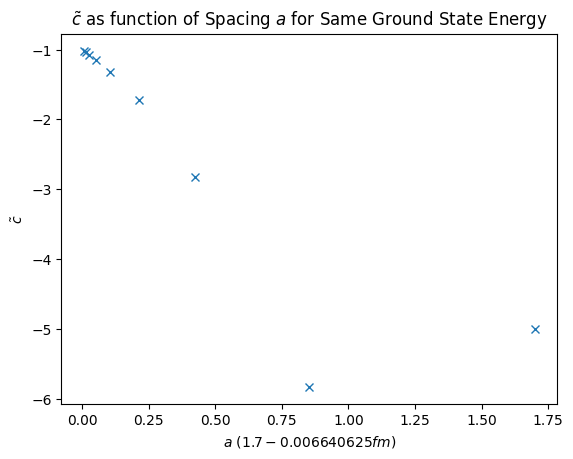

In [396]:
plt.plot(a, cqs, 'x')
plt.xlabel('$a$ $(1.7 - 0.006640625 fm)$')
plt.ylabel('$\\tilde{c}$')
plt.title('$\\tilde{c}$ as function of Spacing $a$ for Same Ground State Energy')

Text(0.5, 1.0, '$c$ as function of Spacing $a$ for Same Ground State Energy')

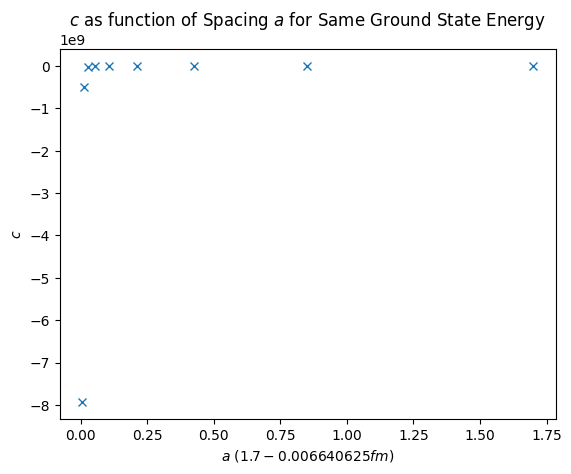

In [10]:
plt.plot(a, c, 'x')
plt.xlabel('$a$ $(1.7 - 0.006640625 fm)$')
plt.ylabel('$c$')
plt.title('$c$ as function of Spacing $a$ for Same Ground State Energy')

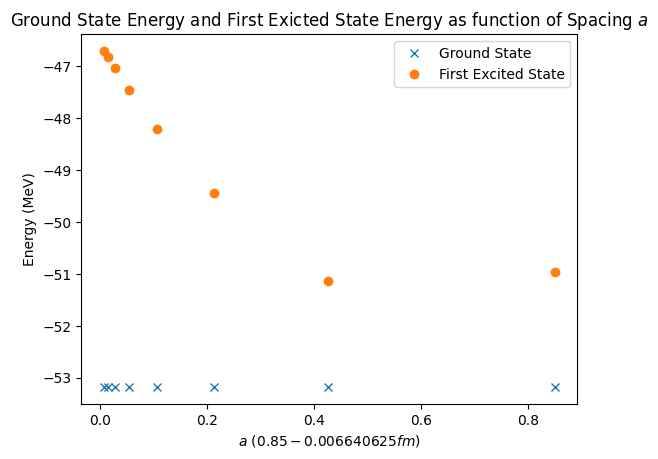

In [395]:
plt.plot(a[1:], cegs[1:], 'x')
plt.plot(a[1:], excited,'o')
plt.xlabel('$a$ $(0.85 - 0.006640625 fm)$')
plt.ylabel('Energy (MeV)')
plt.title('Ground State Energy and First Exicted State Energy as function of Spacing $a$')
plt.legend(['Ground State', 'First Excited State'])

Text(0.5, 0, '$a$ $(0.85 - 0.006640625 fm)$')

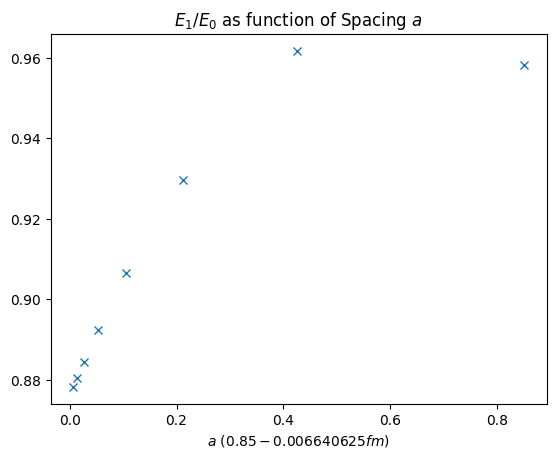

In [394]:
plt.plot(a[1:], cratio, 'x')
plt.title('$E_1/E_0$ as function of Spacing $a$')
plt.xlabel('$a$ $(0.85 - 0.006640625 fm)$')

Text(0.5, 1.0, '(1up, 1down) Ground State Energy and First 4 Excited State Energy as function of Spacing $a$')

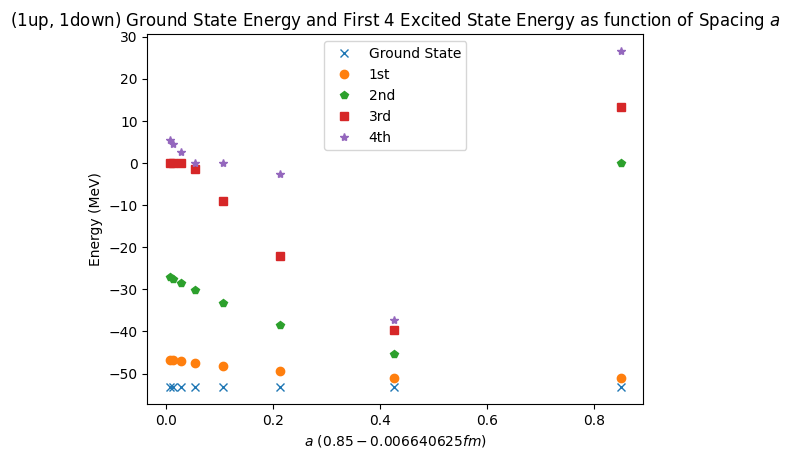

In [403]:
plt.plot(a[1:], sys_1_1_0, 'x')
plt.plot(a[1:], sys_1_1_1, 'o')
plt.plot(a[1:], sys_1_1_2, 'p')
plt.plot(a[1:], sys_1_1_3, 's')
plt.plot(a[1:], sys_1_1_4, '*')
plt.legend(['Ground State', '1st', '2nd', '3rd', '4th'])
plt.xlabel('$a$ $(0.85 - 0.006640625 fm)$')
plt.ylabel('Energy (MeV)')
plt.title('(1up, 1down) Ground State Energy and First 4 Excited State Energy as function of Spacing $a$')

Text(0.5, 1.0, '(2up, 1down) Ground State Energy and First 4 Excited State Energy as function of Spacing $a$')

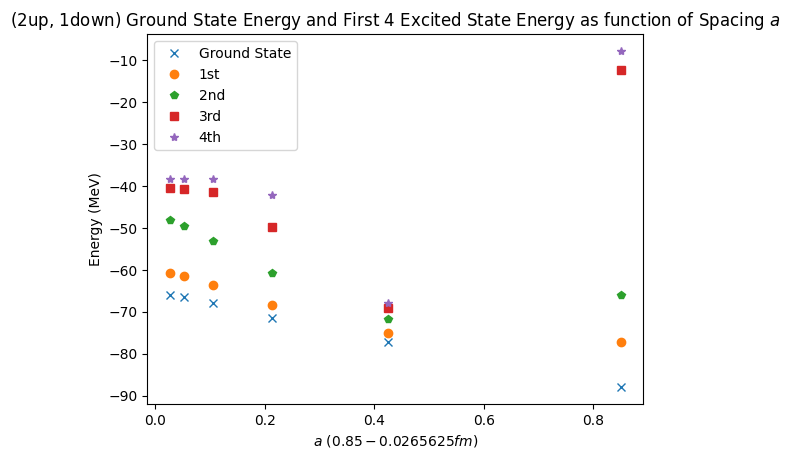

In [409]:
plt.plot(a[1:7], sys_2_1_0, 'x')
plt.plot(a[1:7], sys_2_1_1, 'o')
plt.plot(a[1:7], sys_2_1_2, 'p')
plt.plot(a[1:7], sys_2_1_3, 's')
plt.plot(a[1:7], sys_2_1_4, '*')
plt.legend(['Ground State', '1st', '2nd', '3rd', '4th'])
plt.xlabel('$a$ $(0.85 - 0.0265625 fm)$')
plt.ylabel('Energy (MeV)')
plt.title('(2up, 1down) Ground State Energy and First 4 Excited State Energy as function of Spacing $a$')

Text(0.5, 1.0, '(3up, 1down) Ground State Energy and First 4 Excited State Energy as function of Spacing $a$')

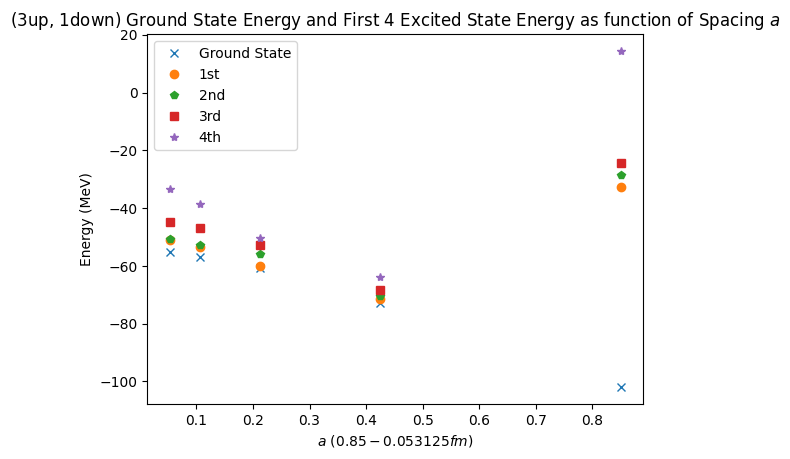

In [412]:
plt.plot(a[1:6], sys_3_1_0, 'x')
plt.plot(a[1:6], sys_3_1_1, 'o')
plt.plot(a[1:6], sys_3_1_2, 'p')
plt.plot(a[1:6], sys_3_1_3, 's')
plt.plot(a[1:6], sys_3_1_4, '*')
plt.legend(['Ground State', '1st', '2nd', '3rd', '4th'])
plt.xlabel('$a$ $(0.85 - 0.053125 fm)$')
plt.ylabel('Energy (MeV)')
plt.title('(3up, 1down) Ground State Energy and First 4 Excited State Energy as function of Spacing $a$')

Text(0.5, 1.0, 'Ground State Energy and First 4 Excited State Energy as function of Spacing $a$')

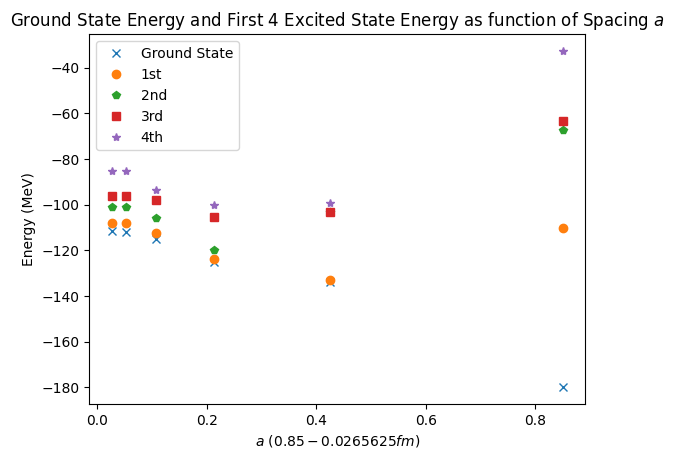

In [410]:
plt.plot(a[1:7], sys_2_2_0, 'x')
plt.plot(a[1:7], sys_2_2_1, 'o')
plt.plot(a[1:7], sys_2_2_2, 'p')
plt.plot(a[1:7], sys_2_2_3, 's')
plt.plot(a[1:7], sys_2_2_4, '*')
plt.legend(['Ground State', '1st', '2nd', '3rd', '4th'])
plt.xlabel('$a$ $(0.85 - 0.0265625 fm)$')
plt.ylabel('Energy (MeV)')
plt.title('Ground State Energy and First 4 Excited State Energy as function of Spacing $a$')

In [31]:
Ls = [2, 4, 8, 16, 32, 64, 128, 256, 512]
a = [3.4 / l for l in Ls]
cqs = [-5, -5.833333, -2.82146615, -1.725212198, -1.31845505, -1.148799979, -1.071886098, -1.0353270445 ,-1.0175111255]
lamq = [-5.00355, -3.69772, -1.9151, -0.96, -0.480081, -0.240043, -0.120022, -0.060011, -0.0300055]
cegs = [-53.17604882, -53.17604451, -53.17604877, -53.17604877, 
       -53.17604802, -53.17604882, -53.17604836, -53.17604810, -53.17604876]
egs = [-10.70070456, -10.70073885, -10.7007409, -10.70071986, -10.70073247, -10.70072301, -10.70078648, 
       -10.70078525, -10.70078509]

In [496]:
# c & three-body force
mphys = 5000
lphys = (3.4 / 197.3)
Lx = 8
N_1d = Lx
J = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/Lx))
mu = -2*J
cq = -2.82146615*J
tbf = -142
basis_1d = spinful_fermion_basis_general(N_1d,Nf=(2, 2),double_occupancy=True)
hop_left = [[-J, i, (i+1)%Lx] for i in range(Lx)]
hop_right = [[J, i, (i+1)%Lx] for i in range(Lx)]
mu_term = [[-mu, i] for i in range(Lx)]
c_interact_1 = [[cq, i, i, (i+1)%Lx, (i+1)%Lx] for i in range(Lx)]
c_interact_2 = [[cq, (i+1)%Lx, (i+1)%Lx, i, i] for i in range(Lx)]
c_interact_3 = [[-cq, i, (i+1)%Lx, (i+1)%Lx, i] for i in range(Lx)]  
c_interact_4 = [[-cq, (i+1)%Lx, i, i, (i+1)%Lx] for i in range(Lx)]
three_body1 = [[tbf, (i+1)%Lx, i, i] for i in range(Lx)]
three_body2 = [[tbf, i, (i+1)%Lx, i] for i in range(Lx)]
static = [["+-|", hop_left], ["|+-", hop_left], ["-+|", hop_right], ["|-+", hop_right], 
         ["n|", mu_term], ["|n", mu_term], ["+-|+-", c_interact_1], 
         ["+-|+-", c_interact_2], ["+-|+-", c_interact_3], ["+-|+-", c_interact_4],
         ["nn|n", three_body1], ["n|nn", three_body2]]

no_checks = dict(check_pcon=False, check_symm=False, check_herm=False)
H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64, **no_checks)
E_GS, psi_GS = H.eigsh(k = 1, which = 'SA')
print(E_GS)

[-238.85044732]


In [ ]:
L = [4, 8]
three_body_force = [-88.5, -142]
ground_state_energy_2_1 = [-90.96211253, -90.48563302]
ground_state_energy_3_1 = [-118.36624777, -110.66085591]
ground_state_energy_2_2 = [-202.50126001, -238.85044732]

In [ ]:
[-77.23468117 -75.17502689 -75.17502689 -71.86282542 -71.86282542
 -69.11944074 -69.11944074 -67.94193556 -41.58927907 -35.78912498]

In [429]:
-53.17*11/8

-73.10875

In [372]:
mphys = 5000
lphys = (3.4 / 197.3)
Lx = 4
N_1d = Lx
J = ((2*np.pi**2)/(mphys*lphys**2))/(2-2*np.cos((2*np.pi)/Lx))
mu = -2*J
cq = -5.833333*J

basis_1d = spinful_fermion_basis_general(N_1d,Nf=(1, 1),double_occupancy=True)
hop_left = [[-J, i, (i+1)%Lx] for i in range(Lx)]
hop_right = [[J, i, (i+1)%Lx] for i in range(Lx)]
mu_term = [[-mu, i] for i in range(Lx)]
c_interact_1 = [[cq, i, i, (i+1)%Lx, (i+1)%Lx] for i in range(Lx)]
c_interact_2 = [[cq, (i+1)%Lx, (i+1)%Lx, i, i] for i in range(Lx)]
c_interact_3 = [[-cq, i, (i+1)%Lx, (i+1)%Lx, i] for i in range(Lx)]  
c_interact_4 = [[-cq, (i+1)%Lx, i, i, (i+1)%Lx] for i in range(Lx)]


static = [["+-|", hop_left], ["|+-", hop_left], ["-+|", hop_right], ["|-+", hop_right], 
         ["n|", mu_term], ["|n", mu_term], ["+-|+-", c_interact_1], 
        ["+-|+-", c_interact_2], ["+-|+-", c_interact_3], ["+-|+-", c_interact_4]]

no_checks = dict(check_pcon=False, check_symm=False, check_herm=False)
H = hamiltonian(static, [], basis=basis_1d, dtype=np.float64, **no_checks)
E_GS, psi_GS = H.eigsh(k = 10, which = 'SA')
print(E_GS)

[-5.31760445e+01 -5.31760445e+01 -5.09603757e+01 -5.09603757e+01
  1.42108547e-14  1.32940122e+01  1.32940122e+01  2.65880244e+01
  2.65880244e+01  2.65880244e+01]
